# Speech Sentiment Analysis using CNNs and CRNNs Based on Mel Spectrograms and MFCCs.


## 1- Data Collection

We will be using the kaggle api to automate the process of downloading the datasets. The datasets will each be unzipped to a separate folder.

In [7]:
# Collect CREMA-D audio dataset from Kaggle into a folder called 'cremad'
#!kaggle datasets download -d ejlok1/cremad --unzip -p cremad

In [6]:
# Collect RAVDESS audio dataset from Kaggle into a folder called 'ravdess'
#!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio --unzip -p ravdess

In [5]:
# Collect TESS audio dataset from Kaggle
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess --unzip

In [4]:
# Collect SAVEE audio dataset from Kaggle into a folder called 'savee'
#!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip -p savee

## 2- Data Wrangling

Each of the datasets has a different way of naming the audio files and their labels. Each dataset also has different emotions. So, we will have to do some wrangling to get them all in the same format.

In [7]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# This allows normalization for the specgrams which allows for clearer visualizations
from matplotlib.colors import Normalize
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
# Set style and color palette
sns.set(style='darkgrid', palette='magma')
# Change the setting and put it in a dictionary
plot_settings = {
    'font.family': 'calibri',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 140,
    'axes.titlepad': 15,
    'axes.labelpad': 15,
    'figure.titlesize': 24,
    'figure.titleweight': 'bold',
}
# Use the dictionary variable to update the settings using matplotlib
plt.rcParams.update(plot_settings)

In [8]:
# Check if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# Put the cremad directory in a list
cremad = os.listdir('cremad/AudioWAV/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files and extract the emotion label and path
for file in cremad:
    # Extract the emotion label from the file name
    emotion = file.split('_')[2]
    if emotion == 'SAD':
        emotion = 'sadness'
    elif emotion == 'ANG':
        emotion = 'anger'
    elif emotion == 'DIS':
        emotion = 'disgust'
    elif emotion == 'FEA':
        emotion = 'fear'
    elif emotion == 'HAP':
        emotion = 'happiness'
    elif emotion == 'NEU':
        emotion = 'neutral'
    elif emotion == 'SUR':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = 'cremad/AudioWAV/' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)
# Create a dataframe from the lists
cremad_df = pd.DataFrame(emotions, columns=['Emotion'])
cremad_df['Path'] = paths
# Inspect the dataframe
cremad_df.head()

Emotion                                 Path
0      anger  cremad/AudioWAV/1001_DFA_ANG_XX.wav
1    disgust  cremad/AudioWAV/1001_DFA_DIS_XX.wav
2       fear  cremad/AudioWAV/1001_DFA_FEA_XX.wav
3  happiness  cremad/AudioWAV/1001_DFA_HAP_XX.wav
4    neutral  cremad/AudioWAV/1001_DFA_NEU_XX.wav

In [10]:
# Put the ravdess directory in a list
ravdess = os.listdir('ravdess/audio_speech_actors_01-24/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the actor directories in audio_speech_actors_01-24
for dir in ravdess:
    # Loop through all the files in each directory
    for file in os.listdir('ravdess/audio_speech_actors_01-24/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('-')[2]
        if emotion == '01':
            emotion = 'neutral'
        elif emotion == '02':
            emotion = 'calm'
        elif emotion == '03':
            emotion = 'happiness'
        elif emotion == '04':
            emotion = 'sadness'
        elif emotion == '05':
            emotion = 'anger'
        elif emotion == '06':
            emotion = 'fear'
        elif emotion == '07':
            emotion = 'disgust'
        elif emotion == '08':
            emotion = 'surprise'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = 'ravdess/audio_speech_actors_01-24/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)
# Create a dataframe from the lists
ravdess_df = pd.DataFrame(emotions, columns=['Emotion'])
ravdess_df['Path'] = paths
# Inspect the dataframe
ravdess_df.head()

Emotion                                               Path
0  neutral  ravdess/audio_speech_actors_01-24/Actor_01/03-...
1  neutral  ravdess/audio_speech_actors_01-24/Actor_01/03-...
2  neutral  ravdess/audio_speech_actors_01-24/Actor_01/03-...
3  neutral  ravdess/audio_speech_actors_01-24/Actor_01/03-...
4     calm  ravdess/audio_speech_actors_01-24/Actor_01/03-...

In [11]:
# Put the tess directory in a list
tess = os.listdir('tess/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the audio file directories
for dir in tess:
    # Loop through all the files in each directory
    for file in os.listdir('tess/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('.')[0]
        emotion = emotion.split('_')[2]
        if emotion == 'ps':
            emotion = 'surprise'
        elif emotion == 'sad':
            emotion = 'sadness'
        elif emotion == 'disgust':
            emotion = 'disgust'
        elif emotion == 'angry':
            emotion = 'anger'
        elif emotion == 'happy':
            emotion = 'happiness'
        elif emotion == 'neutral':
            emotion = 'neutral'
        elif emotion == 'fear':
            emotion = 'fear'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = 'tess/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)
# Create a dataframe from the lists
tess_df = pd.DataFrame(emotions, columns=['Emotion'])
tess_df['Path'] = paths
# Inspect the dataframe
tess_df.head()

Emotion                               Path
0   anger  tess/OAF_angry/OAF_back_angry.wav
1   anger   tess/OAF_angry/OAF_bar_angry.wav
2   anger  tess/OAF_angry/OAF_base_angry.wav
3   anger  tess/OAF_angry/OAF_bath_angry.wav
4   anger  tess/OAF_angry/OAF_bean_angry.wav

In [12]:
# Put the savee directory in a list
savee = os.listdir('savee/ALL/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files in the ALL directory
for file in savee:
    # Separate the wav file name from the emotion label
    emotion = file.split('.')[0]
    # Extract the emotion label from the file name
    emotion = emotion.split('_')[1]
    # Exclude the numbers from the emotion label
    emotion = emotion[:-2]
    if emotion == 'a':
        emotion = 'anger'
    elif emotion == 'd':
        emotion = 'disgust'
    elif emotion == 'f':
        emotion = 'fear'
    elif emotion == 'h':
        emotion = 'happiness'
    elif emotion == 'n':
        emotion = 'neutral'
    elif emotion == 'sa':
        emotion = 'sadness'
    elif emotion == 'su':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = 'savee/ALL/' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)
# Create a dataframe from the lists
savee_df = pd.DataFrame(emotions, columns=['Emotion'])
savee_df['Path'] = paths
# Inspect the dataframe
savee_df.head()

Emotion                  Path
0   anger  savee/ALL/DC_a01.wav
1   anger  savee/ALL/DC_a02.wav
2   anger  savee/ALL/DC_a03.wav
3   anger  savee/ALL/DC_a04.wav
4   anger  savee/ALL/DC_a05.wav

# 3- Data Exploration, Preparation, and Visualization 

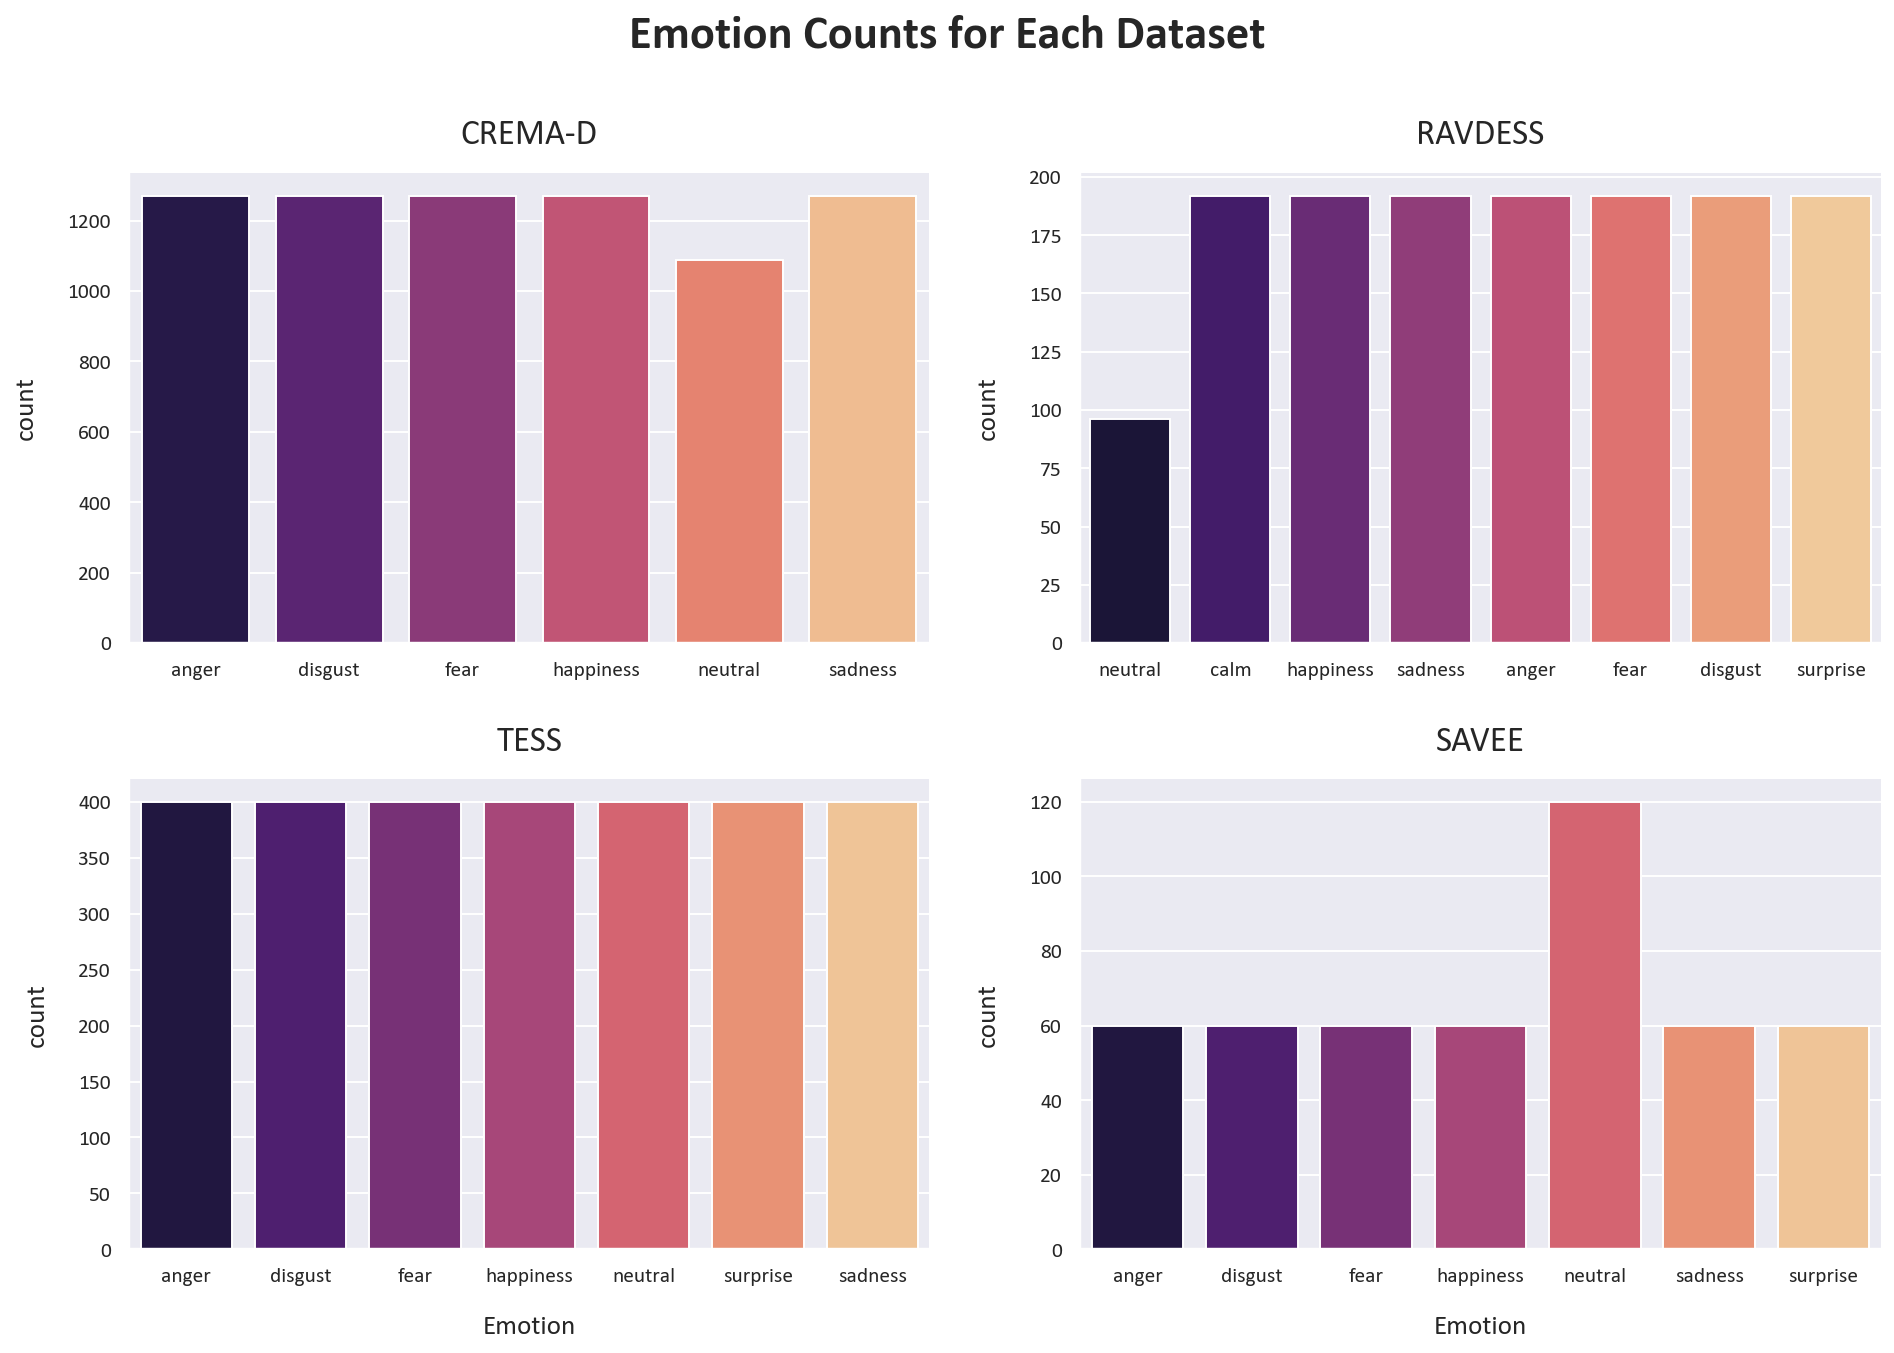

In [13]:
# Plot the value counts for each emotion in each dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(cremad_df, x = cremad_df['Emotion'], palette='magma')
plt.title('CREMA-D')
plt.xlabel('')
plt.subplot(2, 2, 2)
sns.countplot(ravdess_df, x = ravdess_df['Emotion'], palette='magma')
plt.title('RAVDESS')
plt.xlabel('')
plt.subplot(2, 2, 3)
sns.countplot(tess_df, x = tess_df['Emotion'], palette='magma')
plt.title('TESS')
plt.subplot(2, 2, 4)
sns.countplot(savee_df, x = savee_df['Emotion'], palette='magma')
plt.title('SAVEE')
plt.suptitle('Emotion Counts for Each Dataset')
# Adjust the layout so there are no overlapping titles
plt.tight_layout(pad=2)
# Remove the spines
sns.despine()
plt.show()

In [14]:
# Count the number of emotions in each dataset
print('CREMA-D Emotion Counts:')
print(cremad_df['Emotion'].value_counts())
print('\nRAVDESS Emotion Counts:')
print(ravdess_df['Emotion'].value_counts())
print('\nTESS Emotion Counts:')
print(tess_df['Emotion'].value_counts())
print('\nSAVEE Emotion Counts:')
print(savee_df['Emotion'].value_counts())

CREMA-D Emotion Counts:
Emotion
anger        1271
disgust      1271
fear         1271
happiness    1271
sadness      1271
neutral      1087
Name: count, dtype: int64

RAVDESS Emotion Counts:
Emotion
calm         192
happiness    192
sadness      192
anger        192
fear         192
disgust      192
surprise     192
neutral       96
Name: count, dtype: int64

TESS Emotion Counts:
Emotion
anger        400
disgust      400
fear         400
happiness    400
neutral      400
surprise     400
sadness      400
Name: count, dtype: int64

SAVEE Emotion Counts:
Emotion
neutral      120
anger         60
disgust       60
fear          60
happiness     60
sadness       60
surprise      60
Name: count, dtype: int64


In [15]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
df = pd.concat([cremad_df, ravdess_df, tess_df, savee_df], axis=0)
# Reset the index
df = df.reset_index(drop=True)
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  12162 non-null  object
 1   Path     12162 non-null  object
dtypes: object(2)
memory usage: 190.2+ KB


In [16]:
# Count the number of emotions in the combined dataframe
df['Emotion'].value_counts()

Emotion
anger        1923
disgust      1923
fear         1923
happiness    1923
sadness      1923
neutral      1703
surprise      652
calm          192
Name: count, dtype: int64

In [17]:
# Drop the calm emotion as there are too few samples and it is too similar to neutral
df = df[df['Emotion'] != 'calm']

In [18]:
# Check if it was dropped
df['Emotion'].value_counts()

Emotion
anger        1923
disgust      1923
fear         1923
happiness    1923
sadness      1923
neutral      1703
surprise      652
Name: count, dtype: int64

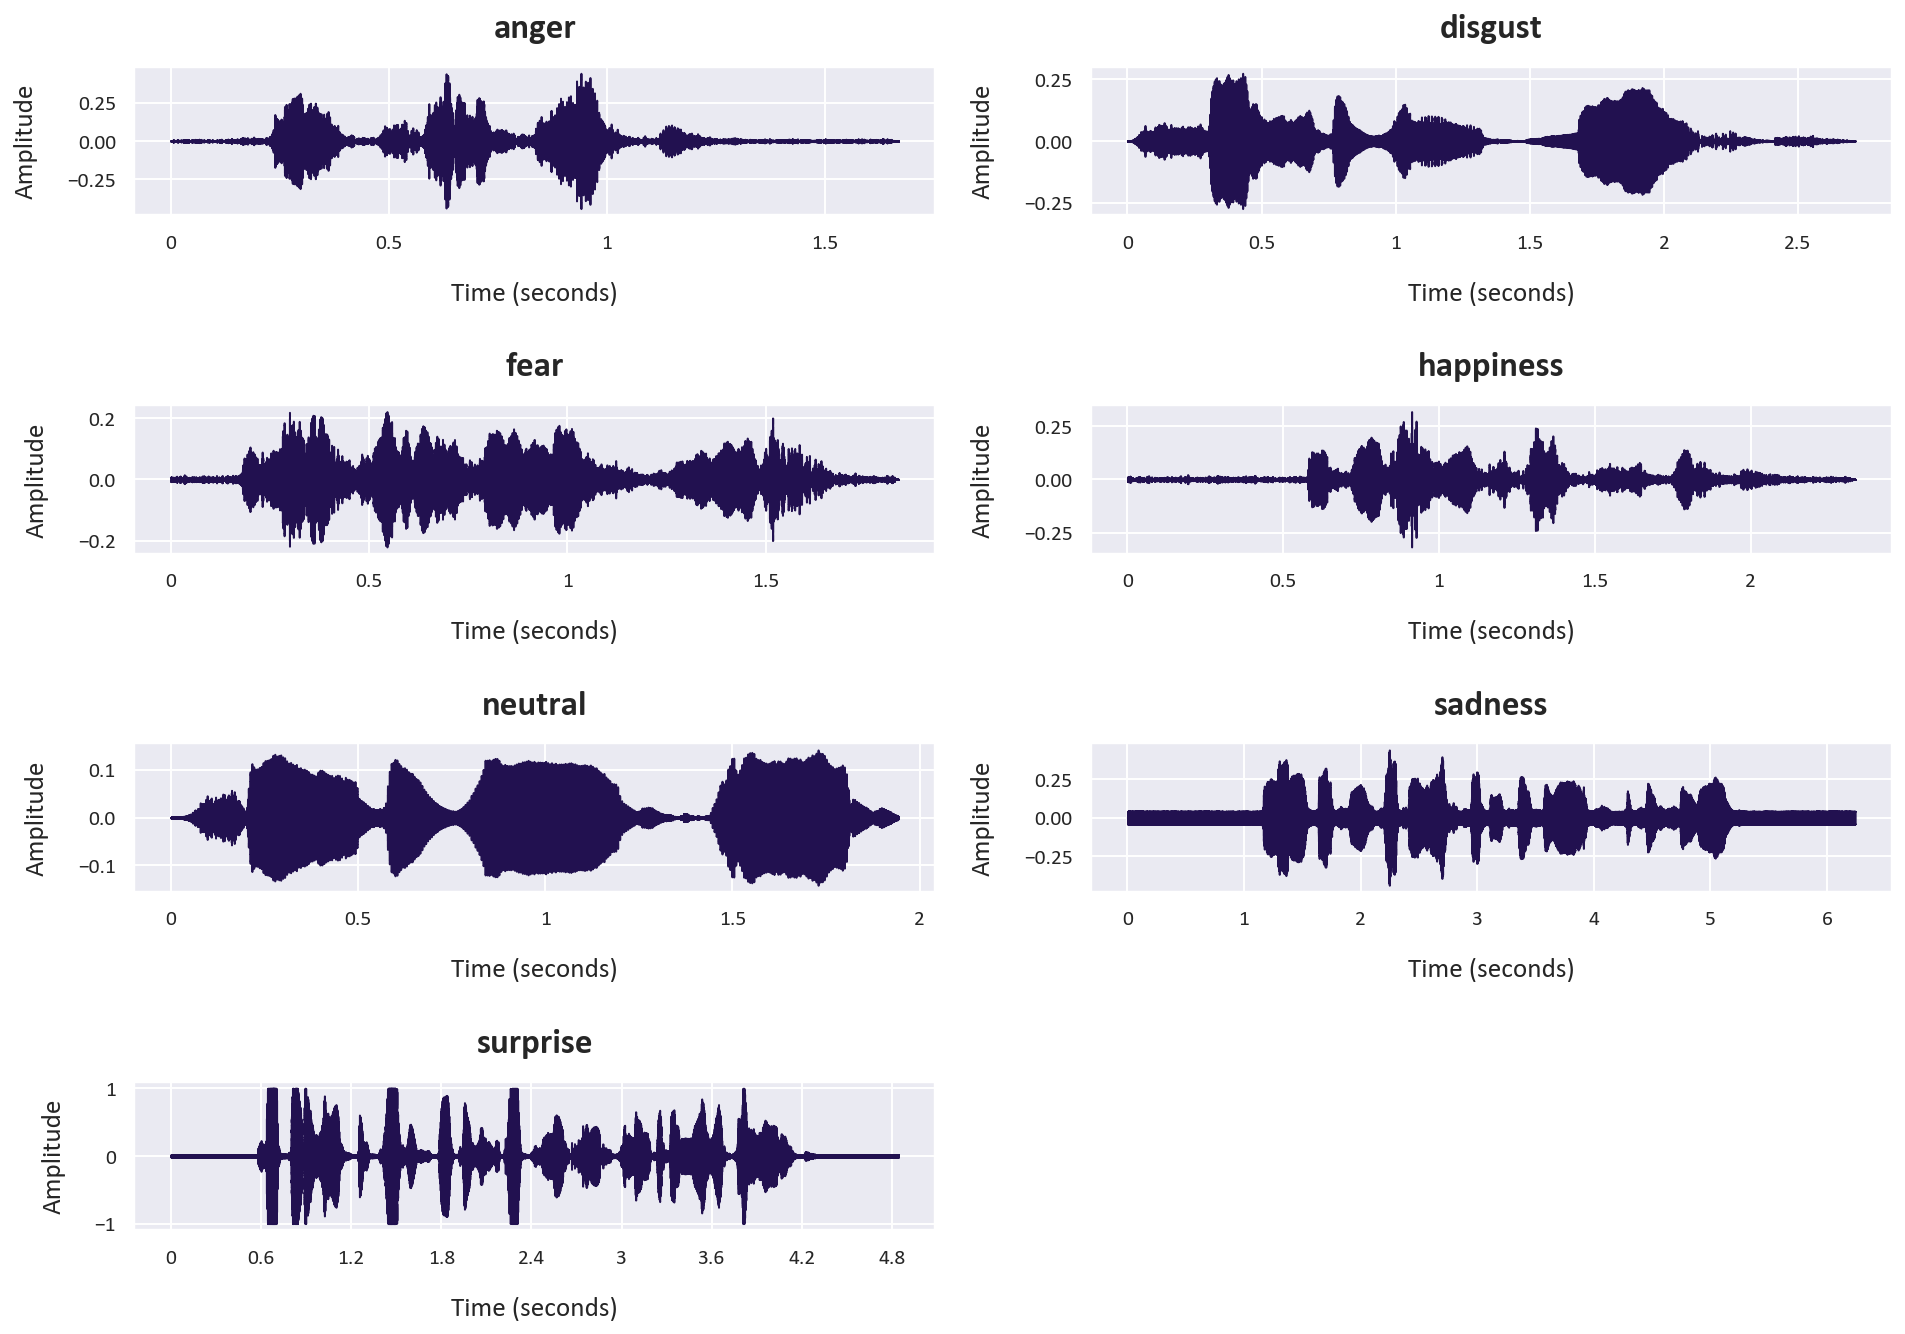

In [19]:
# Get a sample from each emotion type
sample = df.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(1))
# extract the path from the sample
sample_paths = sample['Path'].tolist()
# Create a waveform plot for a sample of each emotion
plt.figure(figsize=(14, 10))
for i in range(7):
    plt.subplot(4, 2, i+1)
    # Load the audio file and set the sampling rate to 44100
    data, sr = librosa.load(sample_paths[i], sr = 44100)
    # Plot the waveform
    librosa.display.waveshow(data, sr=sr)
    # Add a title and make it bold
    plt.title(sample['Emotion'].values[i], fontweight='bold')
    # Add labels to the x and y axes
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')
# Adjust the layout so there are no overlapping titles
plt.tight_layout(pad=2)

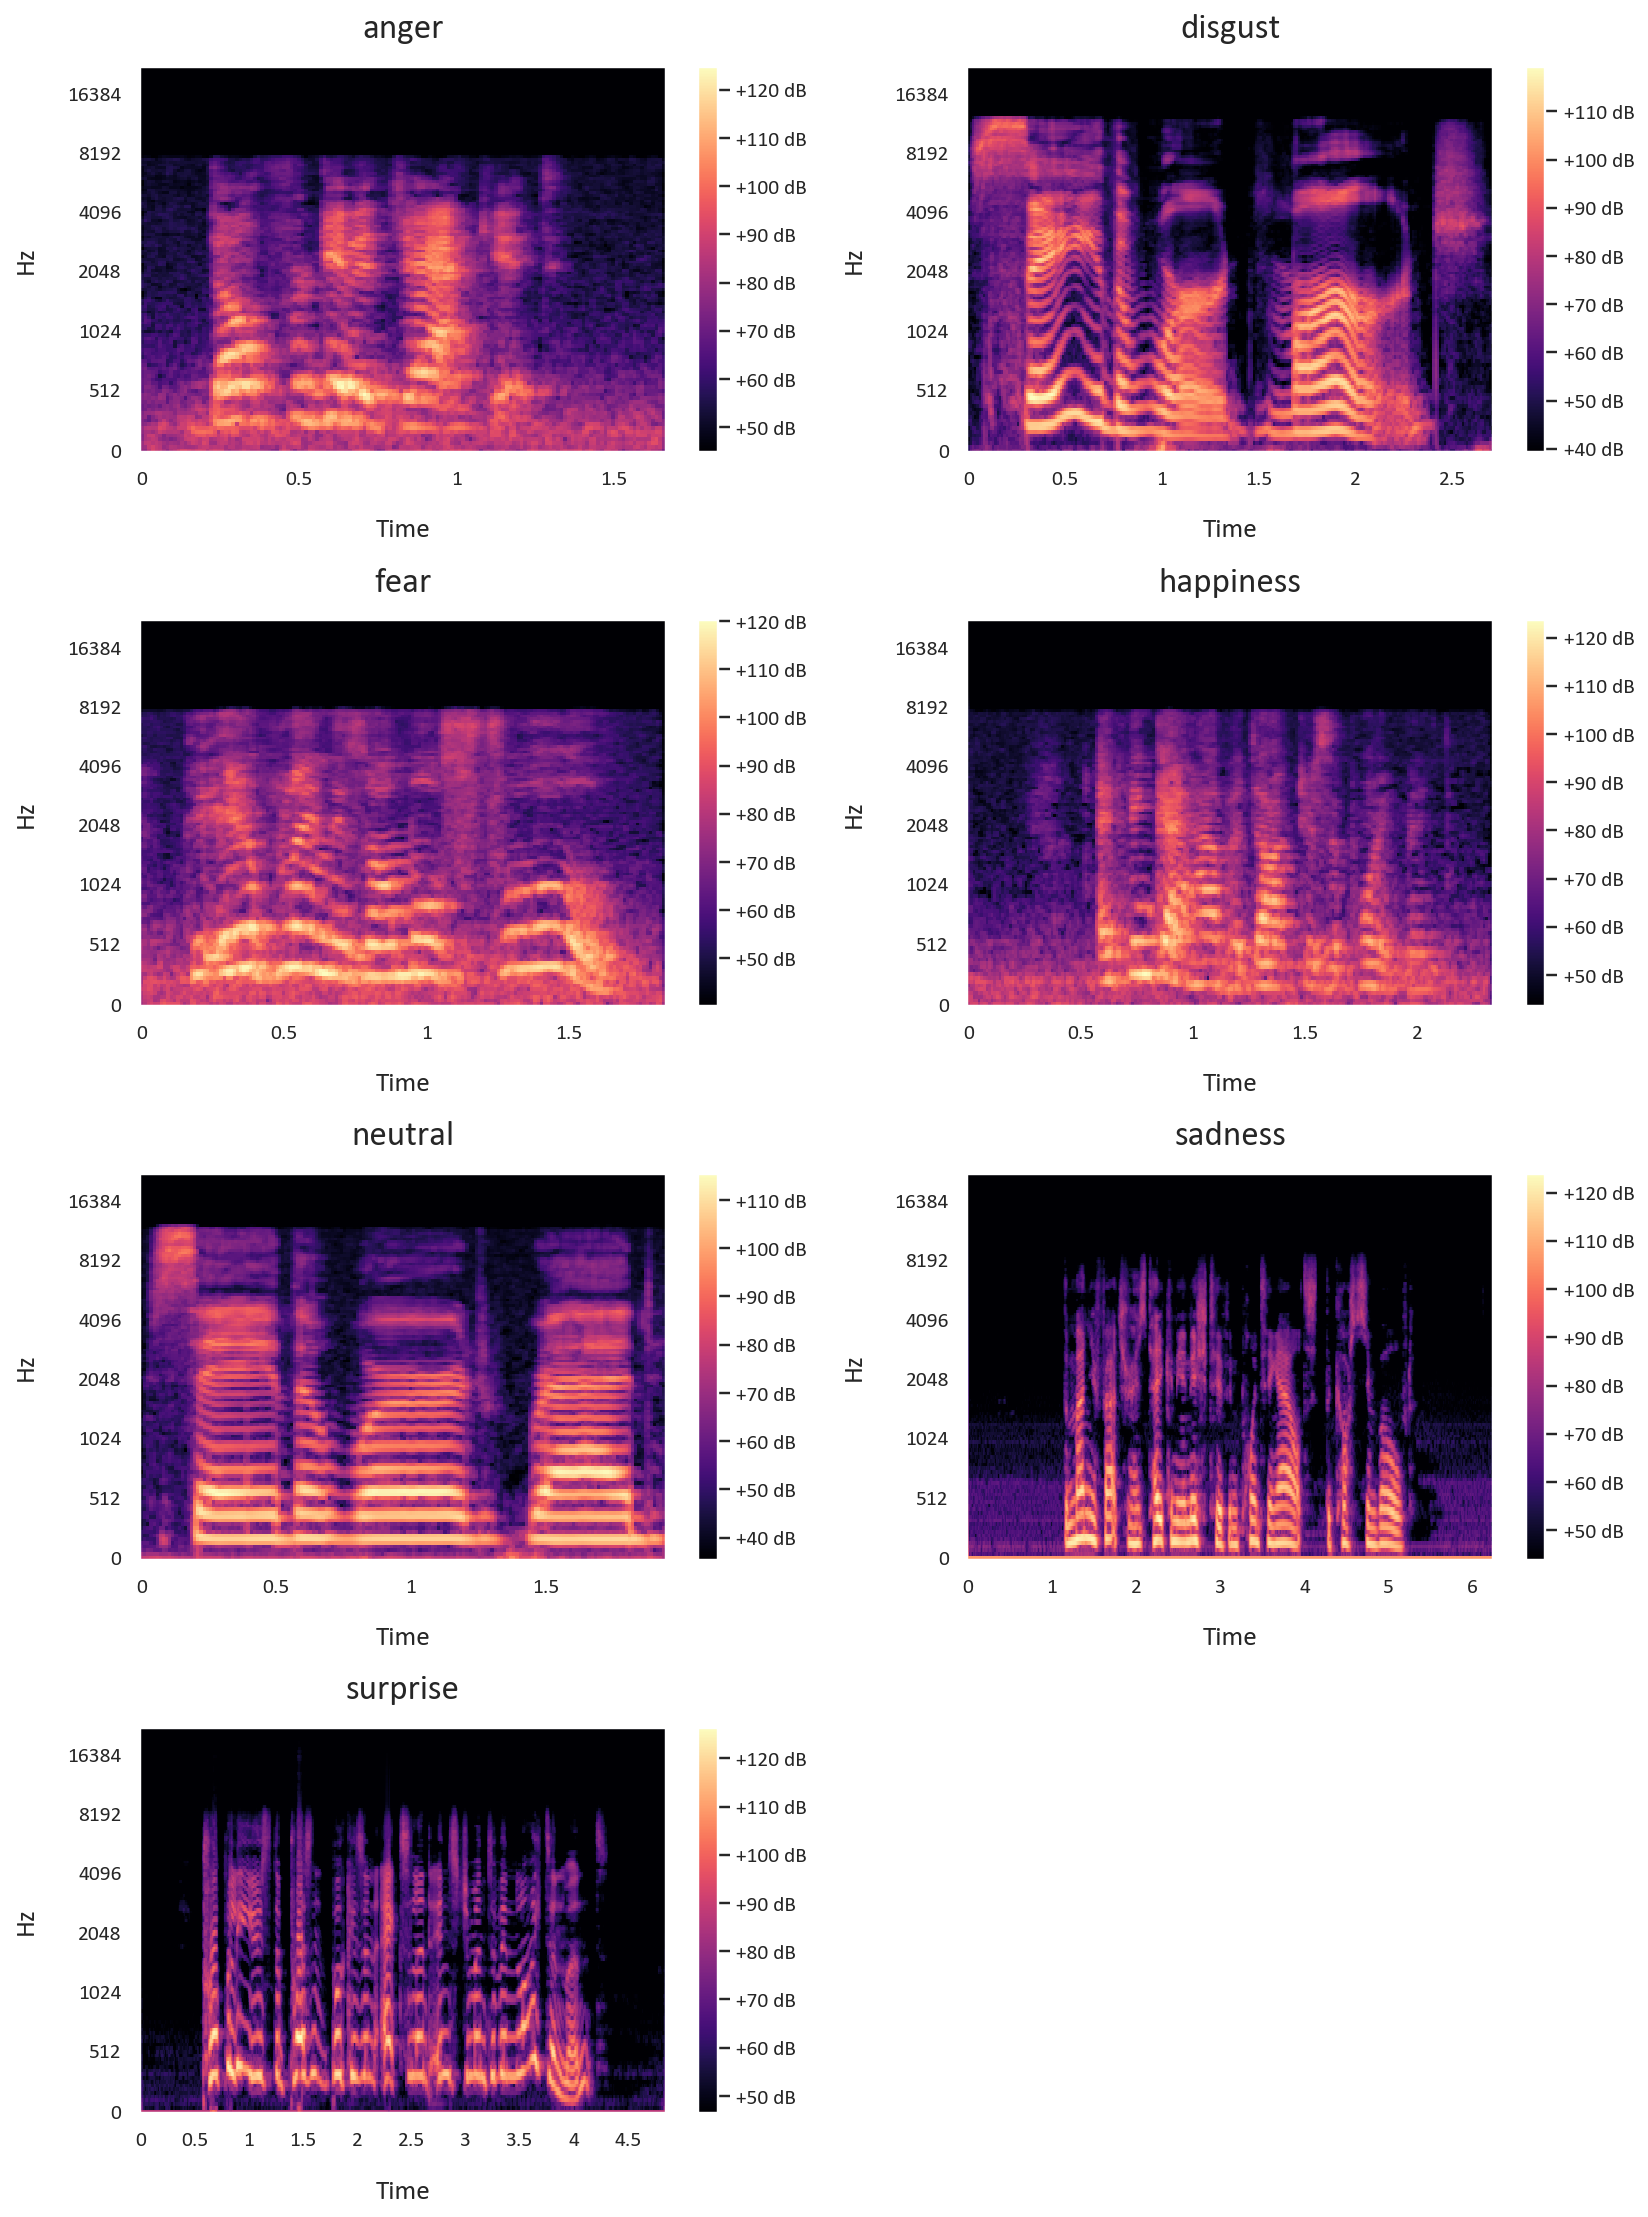

In [20]:
# Create a spectrogram plot for each emotion
plt.figure(figsize=(12, 16))
for i in range(7):
    plt.subplot(4, 2, i+1)
    # Load the audio file, we chose sr = 44100 to standardize the sampling rate
    signal, sr = librosa.load(sample_paths[i], sr=44100)
    # Make the logarithmically scaled mel spectrogram
    signal = librosa.feature.melspectrogram(y = signal, sr=sr)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)
    # Plot the spectrogram
    librosa.display.specshow(signal, sr=sr, x_axis='time', y_axis='mel')
    plt.title(sample['Emotion'].values[i])
    # Plot a color bar to show the intensity scale from 0 Decibels to the max
    plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
    

## 4- Data Preprocessing

We will be using the librosa library to extract the Mel Spectrograms from the audio files. We will also be using the sklearn library to split the data into training and testing sets.

In [21]:
# Encode the emotion labels into numbers 
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
# Make sure the encoding worked
df['Emotion'].value_counts()

Emotion
0    1923
1    1923
2    1923
3    1923
5    1923
4    1703
6     652
Name: count, dtype: int64

In [22]:
# Create a function that takes an audio file path and returns the mel spectrogram
# as an image, and converts the image into a numpy array
def process_audio(path):
    ''' 
    Load the audio file, convert the audio file into a mel spectrogram,
    return the mel spectrogram as an image, and convert the image into a numpy array
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into a mel spectrogram
    signal = librosa.feature.melspectrogram(y = audio, sr=sr, n_mels=128)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)    # Convert the image into a numpy array
    image = np.array(signal)
    # Return the image
    return image


Numpy array shape: (128, 345)


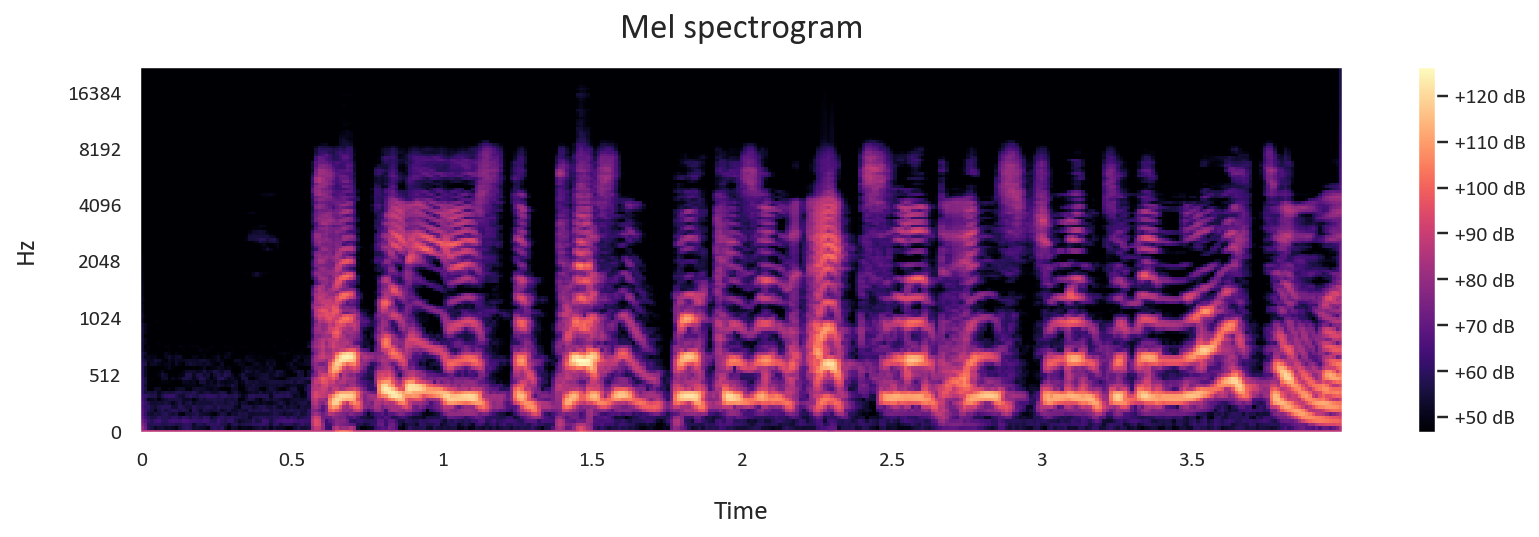

In [23]:
# Test the function on the sample audio file
image = process_audio(sample_paths[6])
# Print the shape of the numpy array
print('Numpy array shape:', image.shape)
# Plot the image
plt.figure(figsize=(12, 4))
librosa.display.specshow(image, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


In [24]:
# Divide the data into features and labels
X_mel = [process_audio(path) for path in df['Path']]
y_mel = df['Emotion']

In [25]:
# Check the length of the feature and label lists
print('Number of images:', len(X_mel))
print('Number of labels:', len(y_mel))

Number of images: 11970
Number of labels: 11970


Label: 0


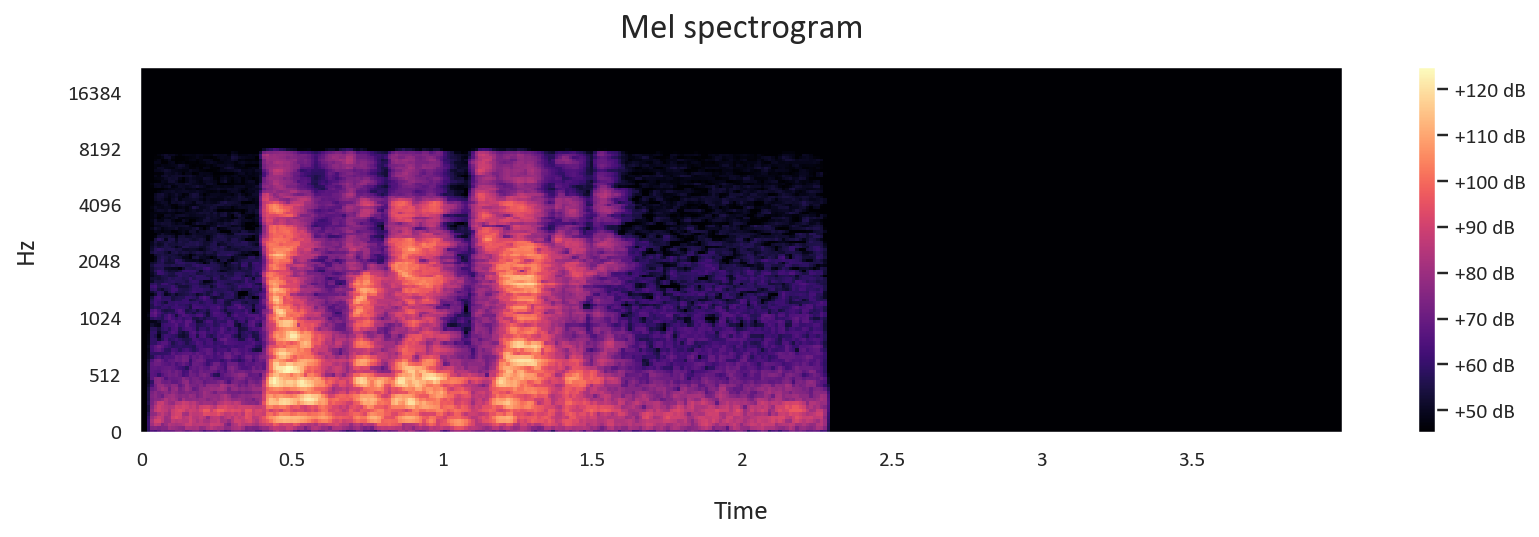

In [26]:
# Plot the first image and its corresponding label
plt.figure(figsize=(12, 4))
librosa.display.specshow(X_mel[0], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
print('Label:', y_mel.iloc[0])

In [27]:
# Divide the data into training and testing sets, with a 80:20 split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_mel, y_mel,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [28]:
# Check the length of the training and testing sets
print('Number of training images:', len(X_train_1))
print('Number of testing images:', len(X_test_1))
print('Number of training labels:', len(y_train_1))
print('Number of testing labels:', len(y_test_1))

Number of training images: 9576
Number of testing images: 2394
Number of training labels: 9576
Number of testing labels: 2394


In [29]:
# Convert the lists into numpy arrays
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1)
y_train_1 = np.array(y_train_1)
y_test_1 = np.array(y_test_1)
# Check the shape of the arrays
print('X_train shape:', X_train_1.shape)
print('X_test shape:', X_test_1.shape)
print('y_train shape:', y_train_1.shape)
print('y_test shape:', y_test_1.shape)

X_train shape: (9576, 128, 345)
X_test shape: (2394, 128, 345)
y_train shape: (9576,)
y_test shape: (2394,)


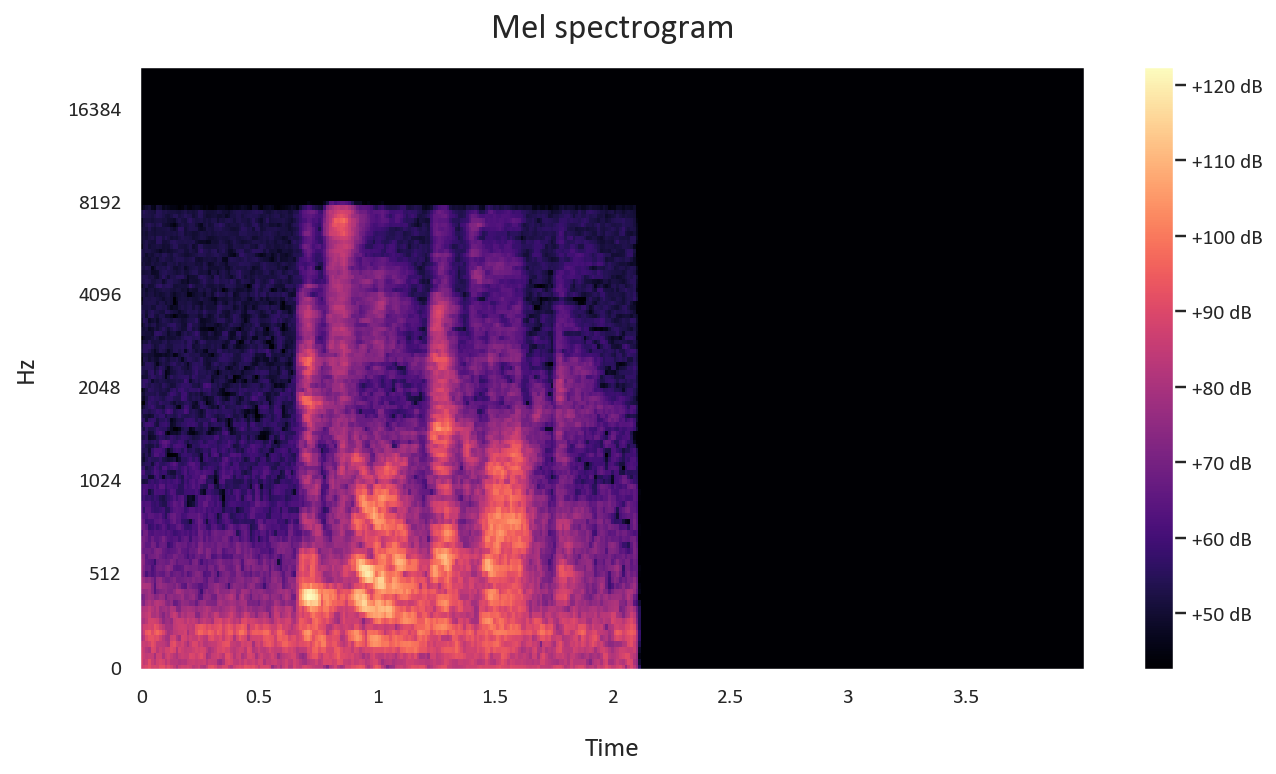

In [30]:
# plot the first image in the training set as a mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_train_1[0].reshape(128, 345), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout(pad=2)

We should standardize the data by making the mean 0 and standard deviation 1 before feeding it to the model. This will help the model train faster and generalize better. 

In [31]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_1)
std = np.std(X_train_1)
X_train_1 = (X_train_1 - mean) / std
X_test_1 = (X_test_1 - mean) / std

In [32]:
# Check the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)
# Check if the data is standardized
print('Mean of standardized data:', np.mean(X_train_1))
print('Standard deviation of standardized data:', np.std(X_train_1))

Mean: 51.308125
Standard deviation: 18.96846
Mean of standardized data: -9.4284815e-07
Standard deviation of standardized data: 0.99999857


In [33]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_1 = X_train_1.reshape(X_train_1.shape[0], 128, 345, 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train_1.shape)
print('X_test shape:', X_test_1.shape)

X_train shape: (9576, 128, 345, 1)
X_test shape: (2394, 128, 345, 1)


Next, we make a Dataset object from the data. This will allow us to make batches, and prefetch the data, which means that the data will be loaded to the GPU while the model is training on the previous batch. This will make the training process faster.

In [28]:
# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_1 = tf.data.Dataset.from_tensor_slices((X_train_1, y_train_1))
# Shuffle, batch, and prefetch the data
train_dataset_1 = train_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_1 = tf.data.Dataset.from_tensor_slices((X_test_1, y_test_1))
# Shuffle, batch, and prefetch the data
test_dataset_1 = test_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

## 5- Modeling

### 5.1- Mel Spectrogram CNN Model
We will treat the mel spectrograms as images and use a CNN to classify them. We will use the Adam optimizer and the sparse categorical cross entropy loss function.

In [29]:
# Define the CNN model
model_mel = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (None, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [30]:
# Compile the model
model_mel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

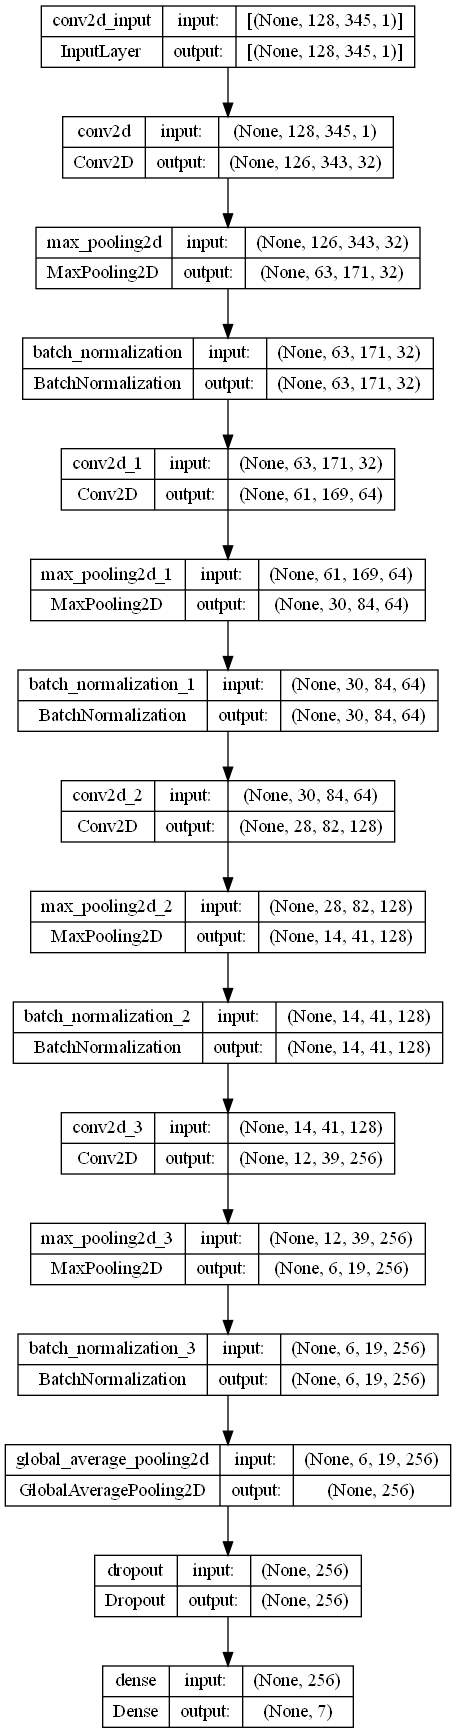

In [31]:
# Plot the model architecture
tf.keras.utils.plot_model(model_mel, show_shapes=True, to_file='model_mel.png')

In [32]:
# Create a callback that stops training when the validation loss plateaus or increases
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode = 'min')

In [33]:
# Create a callback that adjusts the learning rate gradually
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.2,
                                                    min_lr=0.000001,
                                                    patience=3,
                                                    mode='min')

In [34]:
# Train the model
history_mel = model_mel.fit(train_dataset_1,
                    epochs=100,
                    validation_data=test_dataset_1,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100
300/300 [==============================] - 22s 46ms/step - loss: 1.5582 - accuracy: 0.3839 - val_loss: 1.8647 - val_accuracy: 0.3538 - lr: 0.0010
Epoch 2/100
300/300 [==============================] - 13s 42ms/step - loss: 1.3433 - accuracy: 0.4775 - val_loss: 1.4593 - val_accuracy: 0.4612 - lr: 0.0010
Epoch 3/100
300/300 [==============================] - 13s 42ms/step - loss: 1.2412 - accuracy: 0.5264 - val_loss: 1.6717 - val_accuracy: 0.4106 - lr: 0.0010
Epoch 4/100
300/300 [==============================] - 13s 42ms/step - loss: 1.1695 - accuracy: 0.5570 - val_loss: 1.2577 - val_accuracy: 0.5255 - lr: 0.0010
Epoch 5/100
300/300 [==============================] - 13s 42ms/step - loss: 1.1080 - accuracy: 0.5903 - val_loss: 1.1801 - val_accuracy: 0.5635 - lr: 0.0010
Epoch 6/100
300/300 [==============================] - 13s 42ms/step - loss: 1.0519 - accuracy: 0.6091 - val_loss: 1.3004 - val_accuracy: 0.5142 - lr: 0.0010
Epoch 7/100
300/300 [==============================]

In [35]:
# Save the model
model_mel.save('emotion_recognition_mel_spec.keras')

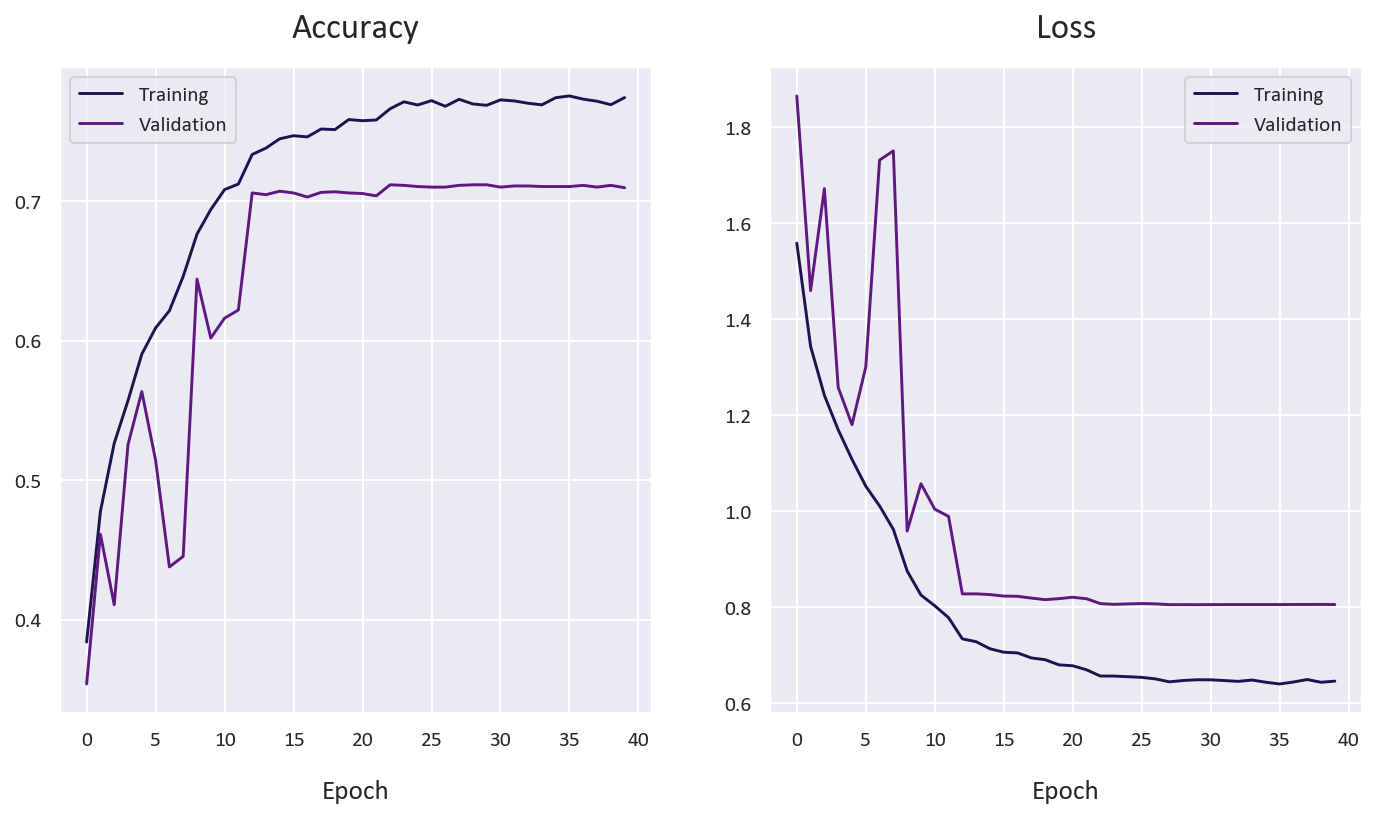

In [36]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mel.history['accuracy'], label='Training')
plt.plot(history_mel.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mel.history['loss'], label='Training')
plt.plot(history_mel.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [37]:
# Measure the precision and recall
y_pred = model_mel.predict(X_test_1)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_1, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

       anger       0.75      0.77      0.76       390
     disgust       0.67      0.67      0.67       369
        fear       0.69      0.65      0.67       378
   happiness       0.68      0.63      0.65       396
     neutral       0.70      0.80      0.75       326
     sadness       0.70      0.72      0.71       396
    surprise       0.92      0.88      0.90       139

    accuracy                           0.71      2394
   macro avg       0.73      0.73      0.73      2394
weighted avg       0.71      0.71      0.71      2394



75/75 [==============================] - 1s 13ms/step


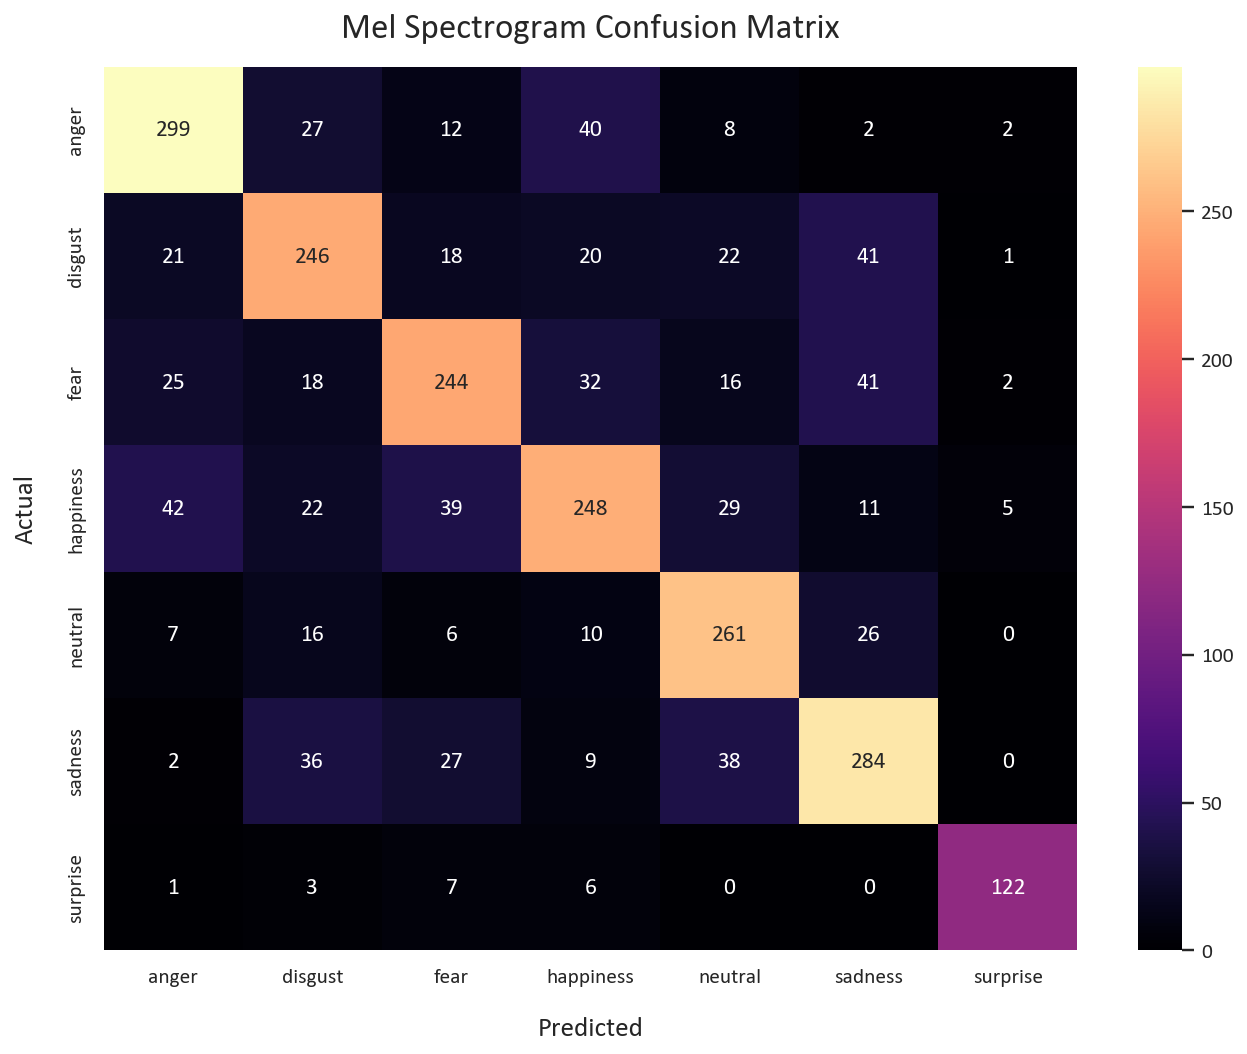

In [38]:
# Plot the confusion matrix for the validation set
# Get the predictions for the test data
y_pred = model_mel.predict(X_test_1)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Get the confusion matrix
cm = tf.math.confusion_matrix(y_test_1, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy(), index=encoder.classes_, columns=encoder.classes_) 
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)


As we can see, the model plateaus at around 70% validation accuracy. This is a great accuracy for such a complex task, as it is hard for even a human to recognize a very specific emotion from an audio file 2-4 seconds long.

Another metric that we can use is MFCCs, or Mel Frequency Cepstral Coefficients, which extracts features from the audio files. This is a common technique used in speech recognition, and it is known to work well. Let's see if it can improve our validation accuracy and loss.

MFCCs are generated by applying the Discrete Cosine Transform (DCT) to the Mel Spectrogram. The DCT is similar to the Fourier Transform, but it only uses real numbers. The DCT is applied to the Mel Spectrogram by applying it to each frequency bin of the Mel Spectrogram. The result is a set of coefficients that represent the power of the signal in each frequency bin.

MFCCs are commonly used in speech recognition because they are a good representation of the vocal tract and the vocal tract shape.

This makes MFCCs the state of the art technique for speech recognition. We used 128 MFCCs to make it more similar to the Mel Spectrograms and less prone to overfitting. However, we could have used fewer MFCCs, as the first 20-30 MFCCs are the most important.

This [review](https://ieeexplore.ieee.org/abstract/document/9955539) explains MFCCs and its performance in many applications in more detail.

We will also treat the MFCCs as images and use a CNN to classify them.

In [34]:
# Create a function that extracts MFCCs from an audio file
def extract_mfcc(path):
    ''' 
    Load the audio file, convert the audio file into MFCCs and return the MFCCs
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # Pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into MFCC
    signal = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=128)
    # Return the MFCCs as a numpy array
    return np.array(signal)

Text(0.5, 1.0, 'MFCC')

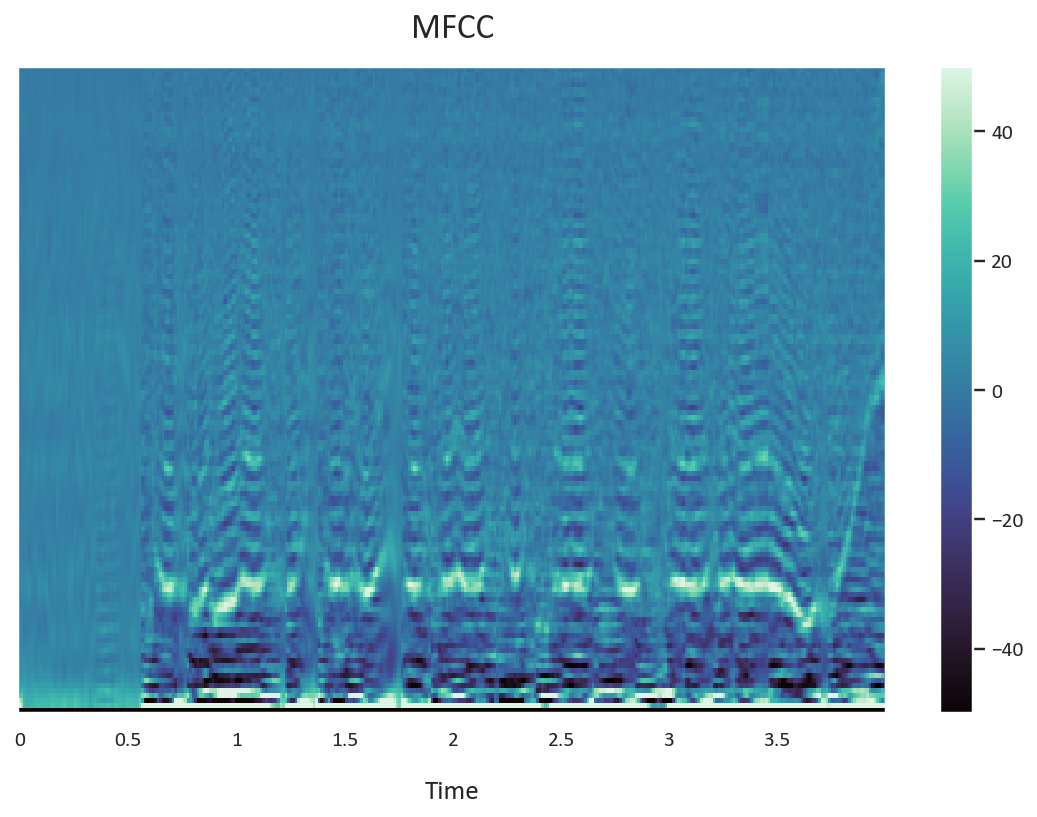

In [35]:
# Test the function on the sample audio file
mfcc = extract_mfcc(sample_paths[6])
# Plot the MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap = 'mako', norm = Normalize( vmin = -50, vmax = 50))
plt.colorbar()
plt.title('MFCC')

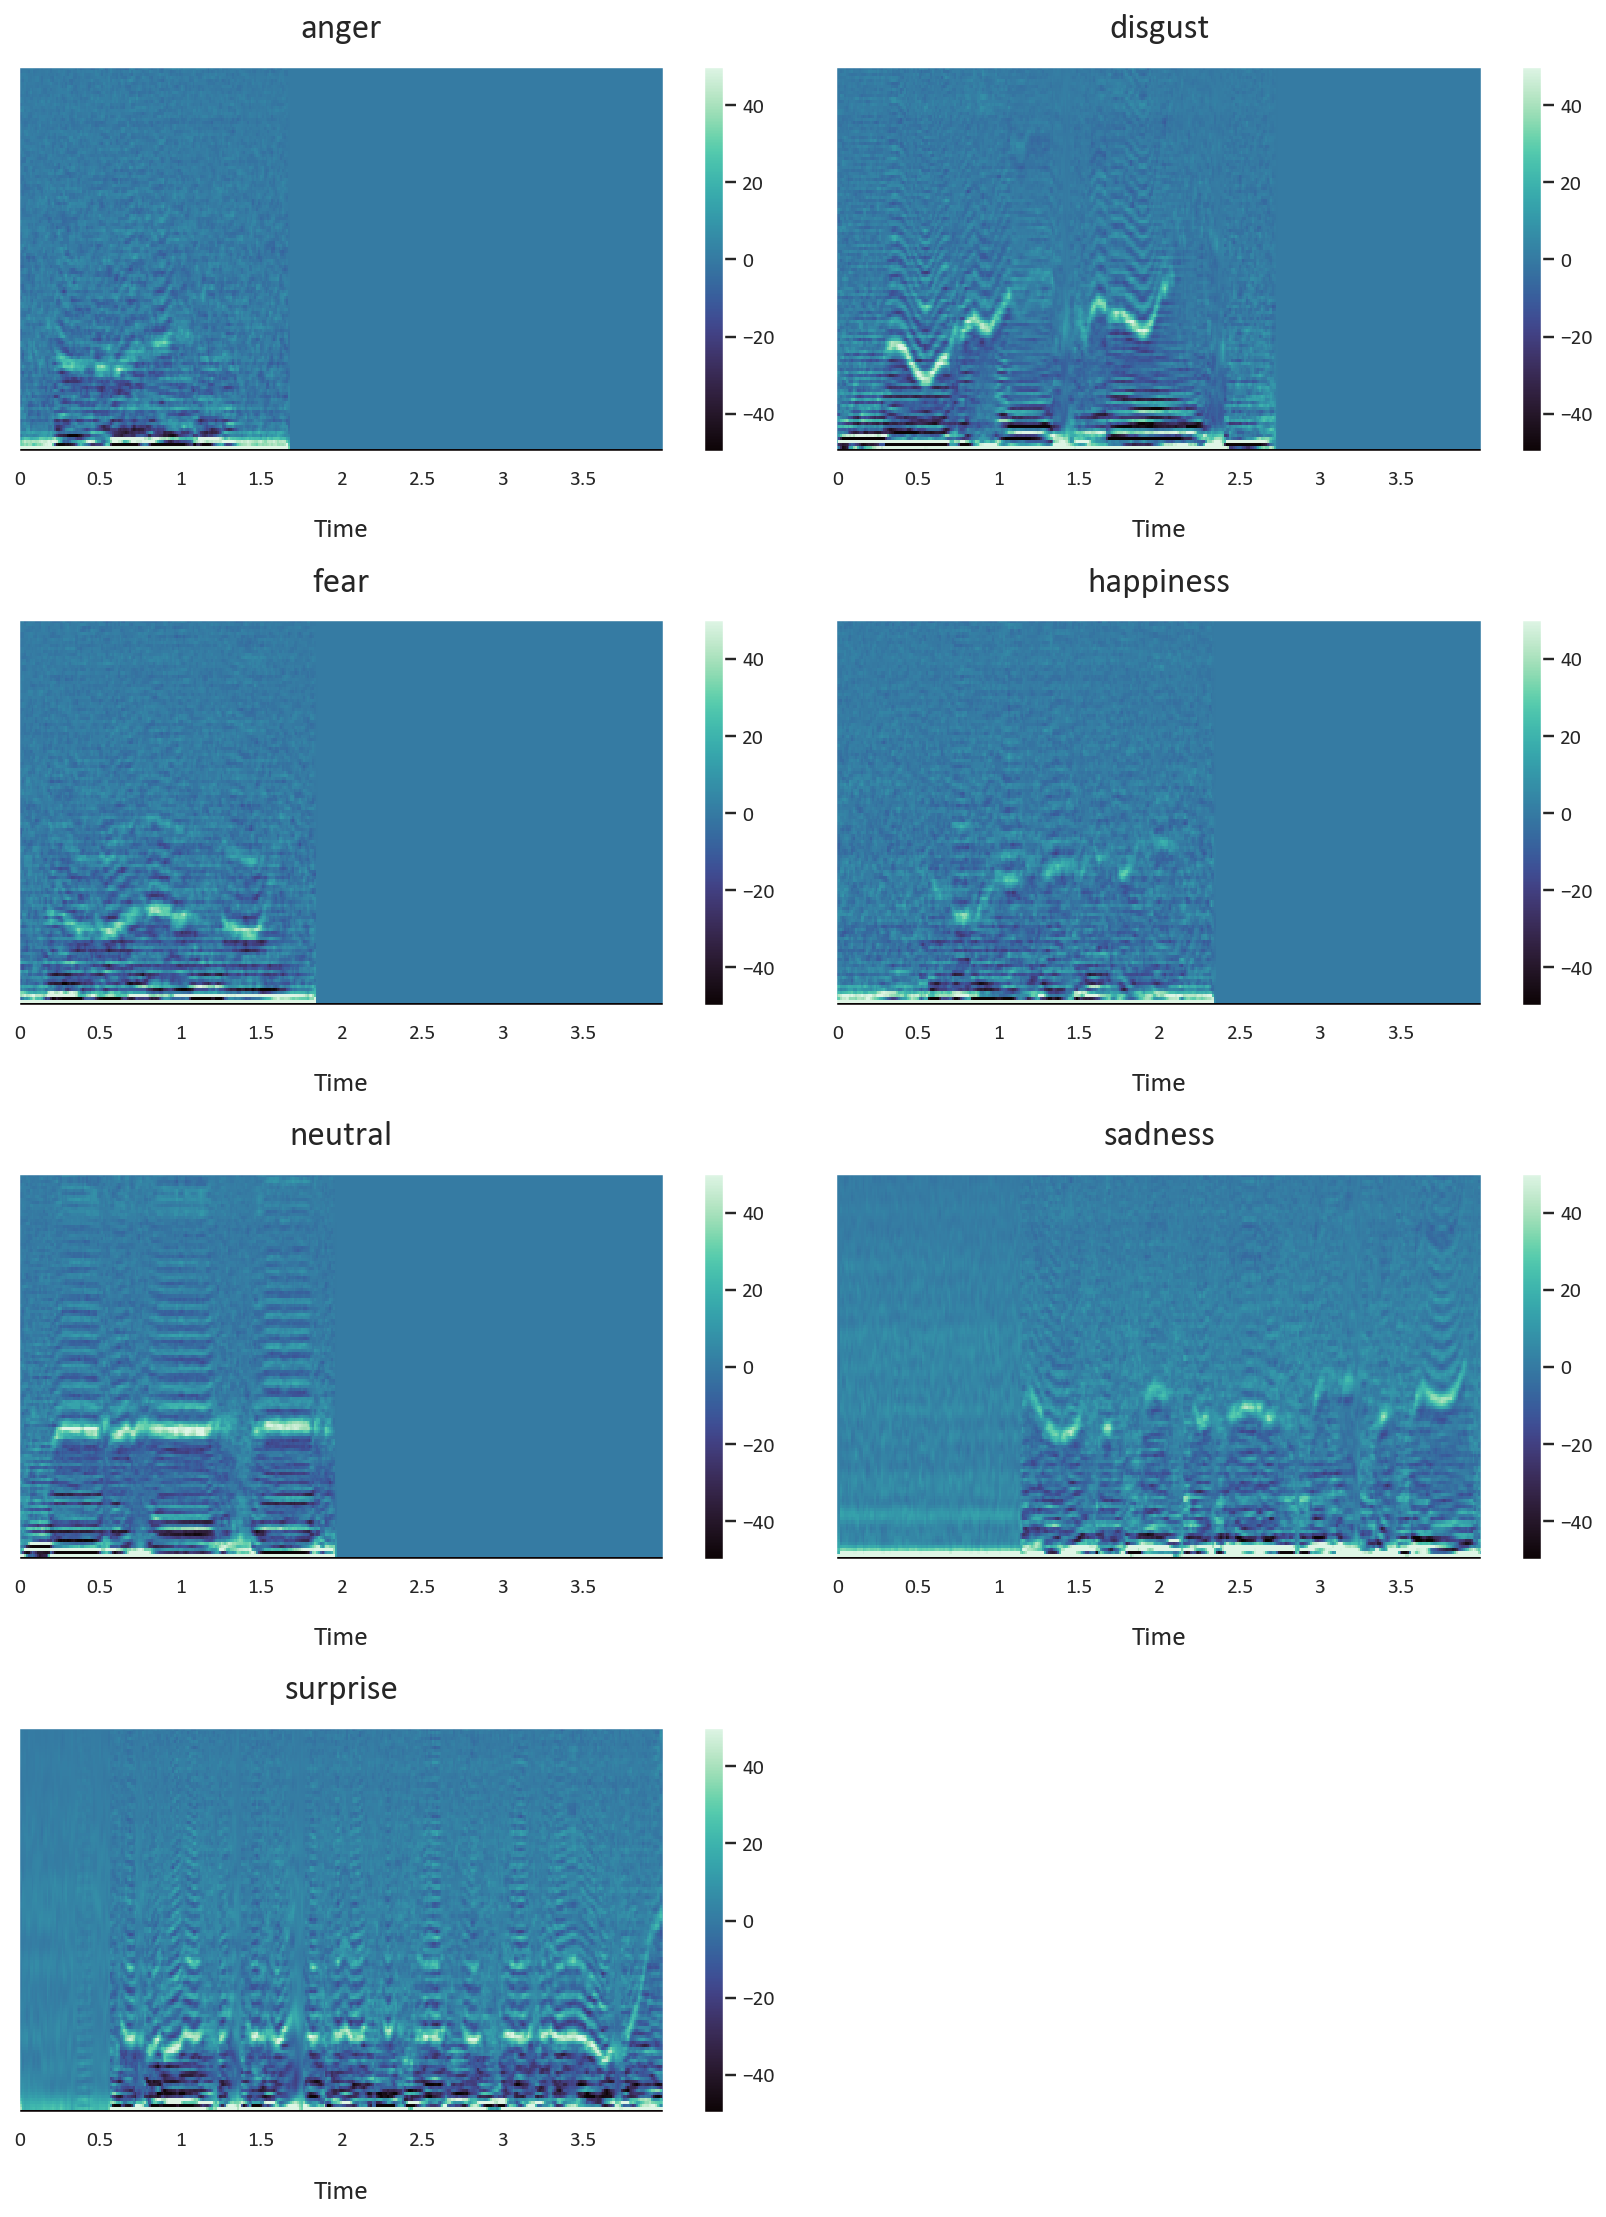

In [36]:
# Visualize the MFCCs for each emotion
plt.figure(figsize=(12, 16))
for i in range(7):
    plt.subplot(4, 2, i+1)
    # Extract the MFCCs from the audio file
    mfcc = extract_mfcc(sample_paths[i])
    librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap = 'mako', norm = Normalize( vmin = -50, vmax = 50))
    plt.title(sample['Emotion'].values[i])
    plt.colorbar()
plt.tight_layout()

In [37]:
# Divide the data into features and labels
X_mfcc = [extract_mfcc(path) for path in df['Path']]
y_mfcc = df['Emotion']

In [38]:
# Check the length of the feature and label lists
print('Number of images:', len(X_mfcc))
print('Number of labels:', len(y_mfcc))

Number of images: 11970
Number of labels: 11970


Label: 0


Text(0.5, 1.0, 'MFCC')

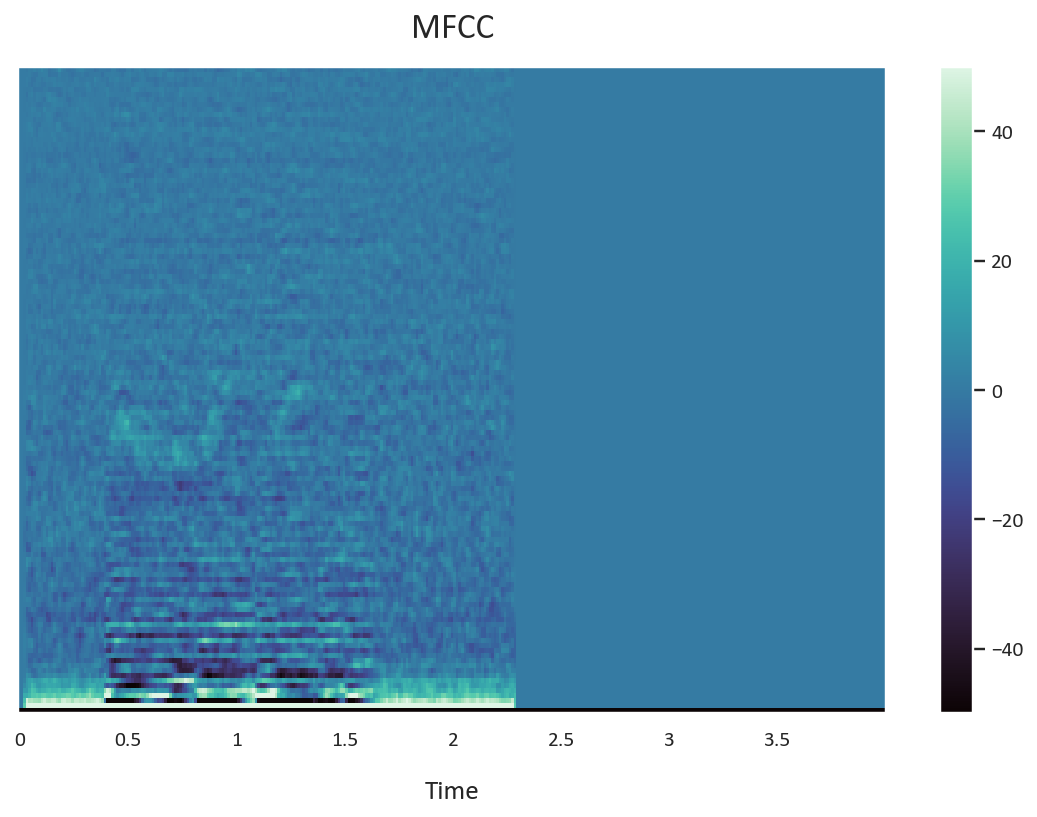

In [39]:
# Print the first image and its corresponding label
print('Label:', y_mfcc[0])
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_mfcc[0], sr=sr, x_axis='time', cmap = 'mako', norm = Normalize( vmin = -50, vmax = 50))
plt.colorbar()
plt.title('MFCC')

In [40]:
# Divide the data into training and testing sets, with a 80:20 split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mfcc, y_mfcc,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [41]:
# Check the length of the training and testing sets
print('Number of training images:', len(X_train_2))
print('Number of testing images:', len(X_test_2))
print('Number of training labels:', len(y_train_2))
print('Number of testing labels:', len(y_test_2))

Number of training images: 9576
Number of testing images: 2394
Number of training labels: 9576
Number of testing labels: 2394


In [42]:
# Convert the lists into numpy arrays
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_2 = np.array(y_train_2)
y_test_2 = np.array(y_test_2)
# Check the shape of the arrays
print('X_train shape:', X_train_2.shape)
print('X_test shape:', X_test_2.shape)
print('y_train shape:', y_train_2.shape)
print('y_test shape:', y_test_2.shape)

X_train shape: (9576, 128, 345)
X_test shape: (2394, 128, 345)
y_train shape: (9576,)
y_test shape: (2394,)


In [43]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_2)
std = np.std(X_train_2)
X_train_2 = (X_train_2 - mean) / std
X_test_2 = (X_test_2 - mean) / std

In [44]:
# Check the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)
# Check if the data is standardized
print('Mean of standardized data:', np.mean(X_train_2))
print('Standard deviation of standardized data:', np.std(X_train_2))

Mean: -3.4271479
Standard deviation: 51.958332
Mean of standardized data: -3.9594985e-09
Standard deviation of standardized data: 0.9999604


In [45]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_2 = X_train_2.reshape(X_train_2.shape[0], 128, 345, 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train_2.shape)
print('X_test shape:', X_test_2.shape)

X_train shape: (9576, 128, 345, 1)
X_test shape: (2394, 128, 345, 1)


In [51]:
# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_2 = tf.data.Dataset.from_tensor_slices((X_train_2, y_train_2))
# Shuffle, batch, and prefetch the data
train_dataset_2 = train_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_2 = tf.data.Dataset.from_tensor_slices((X_test_2, y_test_2))
# Shuffle, batch, and prefetch the data
test_dataset_2 = test_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

### 5.2- MFCCs CNN Model

In [61]:
# Define the CNN model
model_mfcc = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [62]:
# Compile the model
model_mfcc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

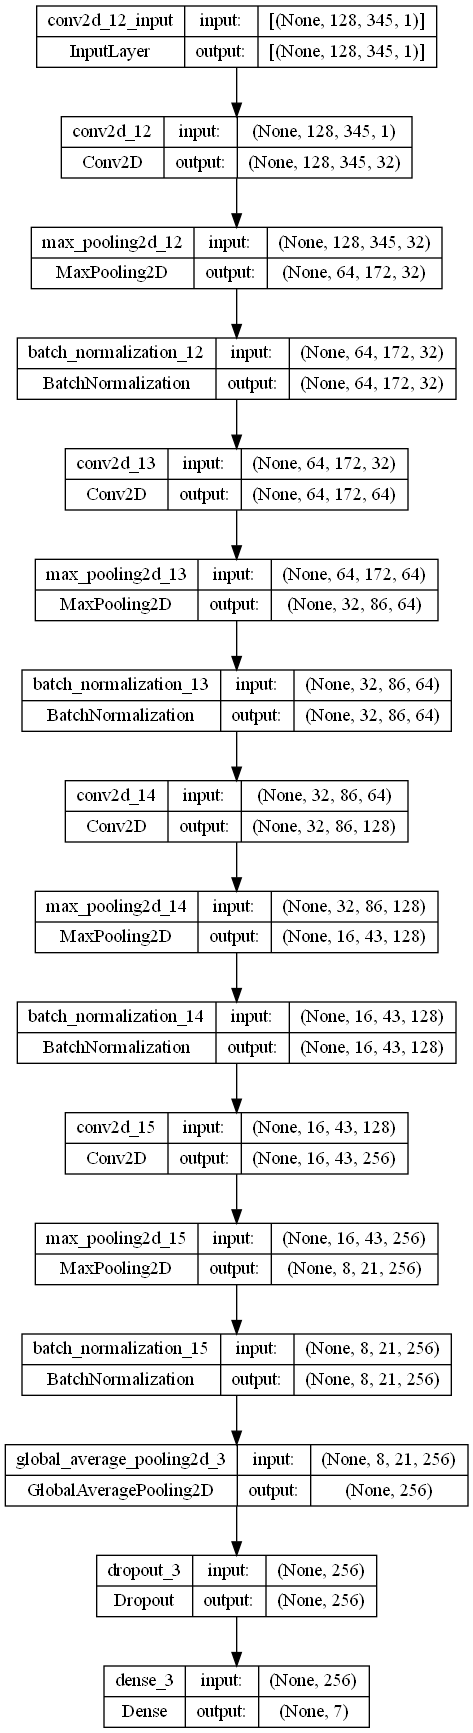

In [63]:
# Plot the model architecture
tf.keras.utils.plot_model(model_mfcc, show_shapes=True, to_file='model_mfcc.png')

In [64]:
# fit the model
history_mfcc = model_mfcc.fit(train_dataset_2,
                    epochs=100,
                    validation_data=test_dataset_2,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100


300/300 [==============================] - 14s 42ms/step - loss: 1.3842 - accuracy: 0.4714 - val_loss: 4.4791 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 2/100
300/300 [==============================] - 12s 41ms/step - loss: 1.1539 - accuracy: 0.5659 - val_loss: 2.6717 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 3/100
300/300 [==============================] - 12s 40ms/step - loss: 1.0466 - accuracy: 0.6018 - val_loss: 1.2349 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 4/100
300/300 [==============================] - 12s 41ms/step - loss: 0.9706 - accuracy: 0.6358 - val_loss: 1.2761 - val_accuracy: 0.5418 - lr: 0.0010
Epoch 5/100
300/300 [==============================] - 12s 41ms/step - loss: 0.8923 - accuracy: 0.6690 - val_loss: 2.2007 - val_accuracy: 0.3551 - lr: 0.0010
Epoch 6/100
300/300 [==============================] - 12s 41ms/step - loss: 0.8291 - accuracy: 0.6960 - val_loss: 1.8465 - val_accuracy: 0.3947 - lr: 0.0010
Epoch 7/100
300/300 [==============================] - 12s 41ms/

In [65]:
# Save the model
model_mfcc.save('emotion_recognition_mfcc.keras')

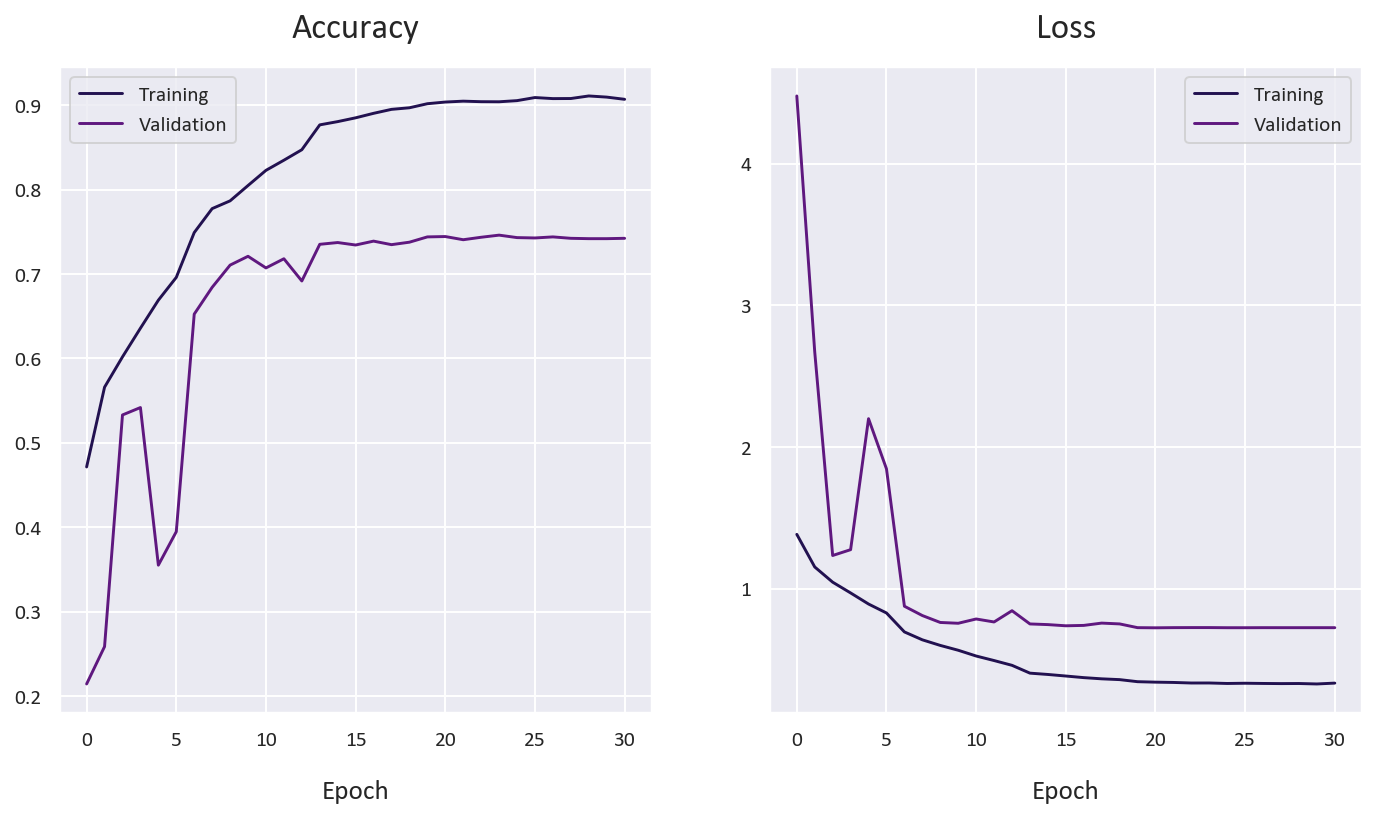

In [67]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mfcc.history['accuracy'], label='Training')
plt.plot(history_mfcc.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mfcc.history['loss'], label='Training')
plt.plot(history_mfcc.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [68]:
# Measure the precision and recall
y_pred = model_mfcc.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_2, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

       anger       0.80      0.82      0.81       390
     disgust       0.71      0.71      0.71       369
        fear       0.70      0.66      0.68       378
   happiness       0.73      0.69      0.71       396
     neutral       0.75      0.77      0.76       326
     sadness       0.70      0.75      0.73       396
    surprise       0.93      0.92      0.93       139

    accuracy                           0.74      2394
   macro avg       0.76      0.76      0.76      2394
weighted avg       0.74      0.74      0.74      2394



75/75 [==============================] - 1s 10ms/step


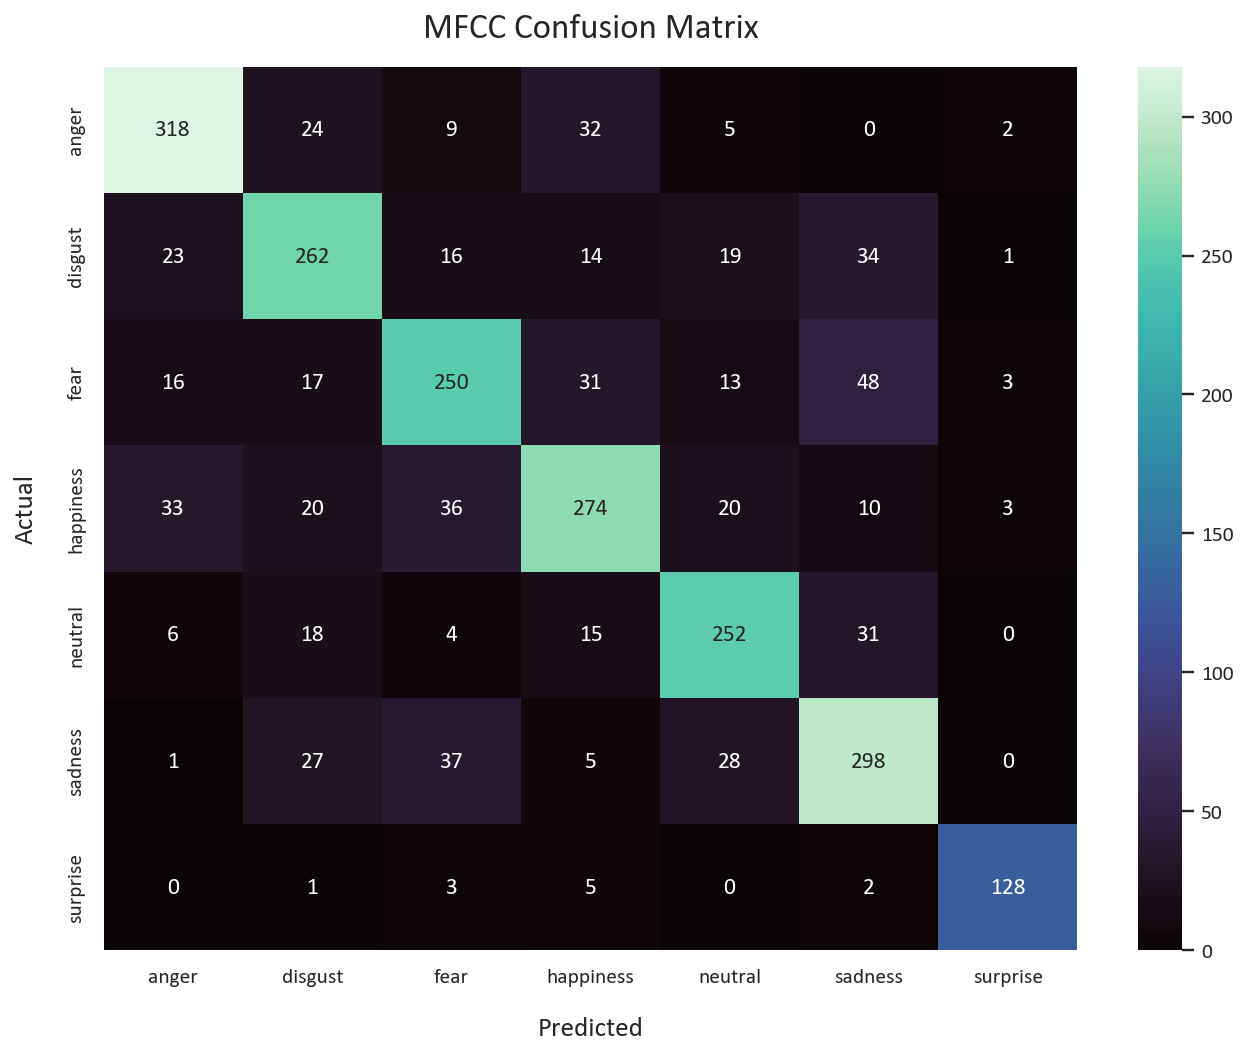

In [69]:
# Plot the confusion matrix for the validation set
# Get the predictions for the test data
y_pred = model_mfcc.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Get the confusion matrix
cm = tf.math.confusion_matrix(y_test_2, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm, annot=True, fmt='', cmap='mako')
plt.title('MFCC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

Next, let's build a CRNN model. A CRNN is a combination of a CNN and an RNN. The CNN is used to extract features from the input, and the RNN is used to make predictions and deduce patterns based on the features extracted by the CNN. This makes CRNNs very powerful, and they are commonly used in speech recognition.

### 5.3- MFCCs CRNN Model

In [78]:
# Build a CRNN model
model_crnn = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Reshape layer to convert (none, 256) to (none, 1, 256) as the LSTM layer
    # requires a 3D input
    tf.keras.layers.Reshape((1, 128)),
    # First bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # Second bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [79]:
# Compile the model
model_crnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

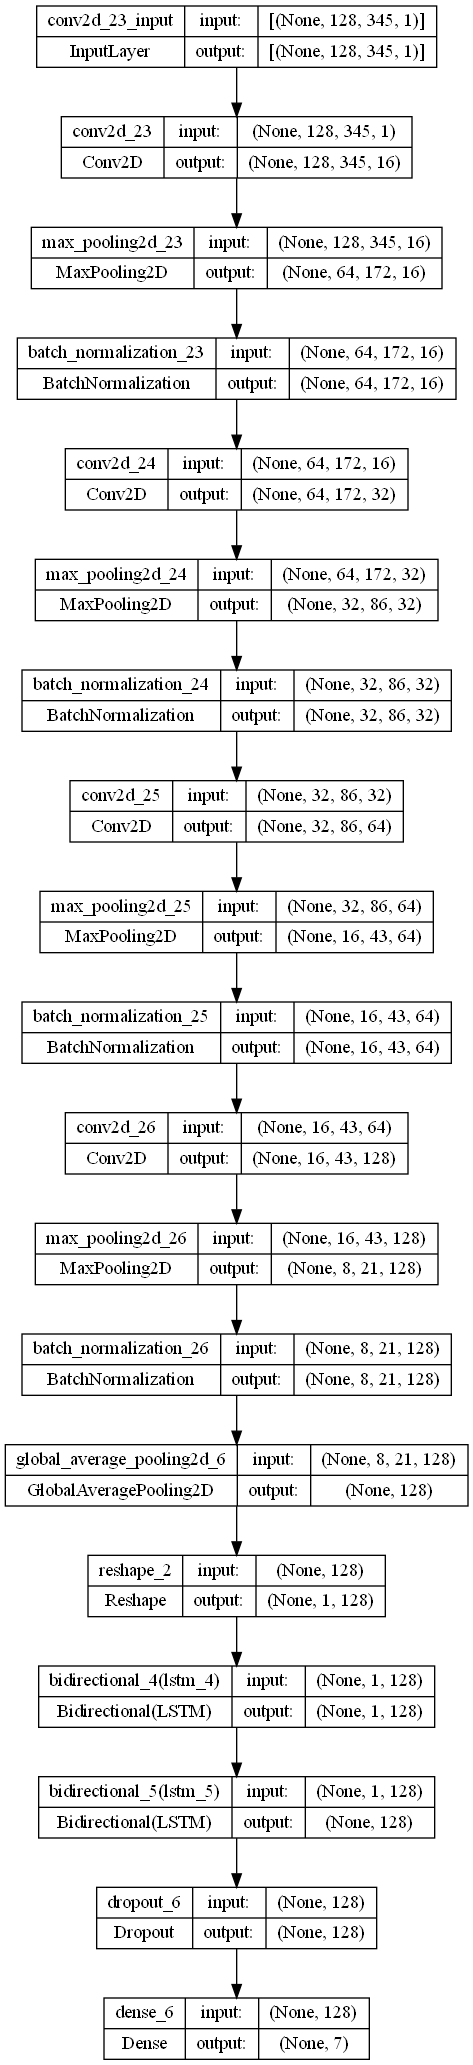

In [80]:
# Plot the model architecture
tf.keras.utils.plot_model(model_crnn, show_shapes=True, to_file='model_crnn.png')

In [81]:
# fit the model
history_crnn = model_crnn.fit(train_dataset_2,
                    epochs=100,
                    validation_data=test_dataset_2,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100


300/300 [==============================] - 16s 35ms/step - loss: 1.4786 - accuracy: 0.4202 - val_loss: 3.2902 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 2/100
300/300 [==============================] - 8s 28ms/step - loss: 1.1626 - accuracy: 0.5515 - val_loss: 1.2551 - val_accuracy: 0.4549 - lr: 0.0010
Epoch 3/100
300/300 [==============================] - 8s 28ms/step - loss: 1.0506 - accuracy: 0.5954 - val_loss: 1.2651 - val_accuracy: 0.5288 - lr: 0.0010
Epoch 4/100
300/300 [==============================] - 8s 28ms/step - loss: 0.9667 - accuracy: 0.6314 - val_loss: 1.3674 - val_accuracy: 0.4528 - lr: 0.0010
Epoch 5/100
300/300 [==============================] - 8s 28ms/step - loss: 0.8903 - accuracy: 0.6656 - val_loss: 1.0597 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 6/100
300/300 [==============================] - 8s 28ms/step - loss: 0.8330 - accuracy: 0.6931 - val_loss: 1.6073 - val_accuracy: 0.5464 - lr: 0.0010
Epoch 7/100
300/300 [==============================] - 8s 28ms/step -

In [82]:
# Save the model
model_crnn.save('emotion_recognition_crnn.keras')

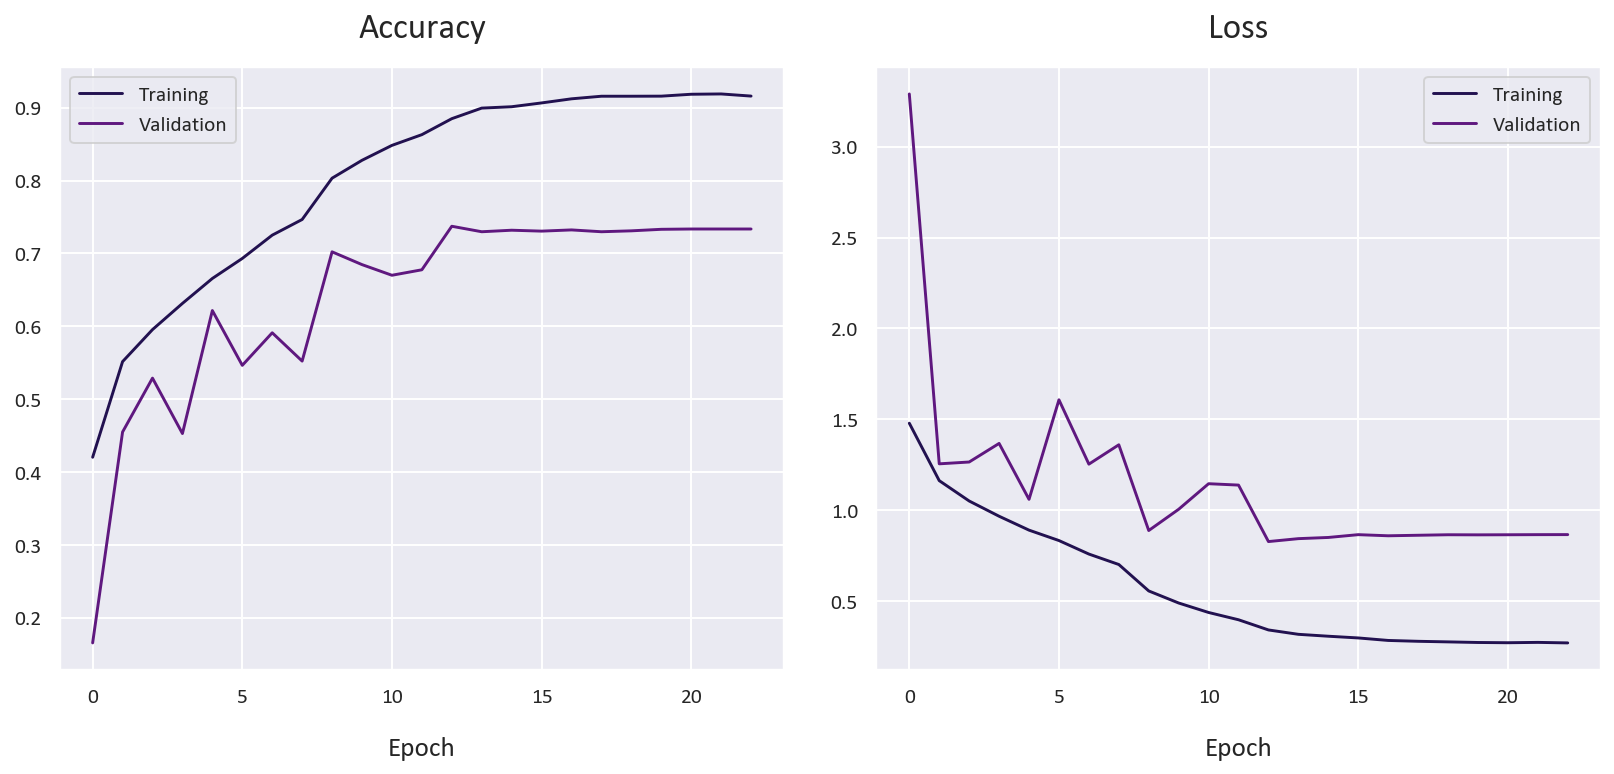

In [83]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_crnn.history['accuracy'], label='Training')
plt.plot(history_crnn.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_crnn.history['loss'], label='Training')
plt.plot(history_crnn.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout(pad=2)

In [84]:
# Measure the precision and recall
y_pred = model_crnn.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_2, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

       anger       0.81      0.81      0.81       390
     disgust       0.71      0.70      0.70       369
        fear       0.70      0.66      0.68       378
   happiness       0.72      0.68      0.70       396
     neutral       0.75      0.75      0.75       326
     sadness       0.68      0.75      0.71       396
    surprise       0.91      0.91      0.91       139

    accuracy                           0.74      2394
   macro avg       0.75      0.75      0.75      2394
weighted avg       0.74      0.74      0.74      2394



75/75 [==============================] - 1s 12ms/step


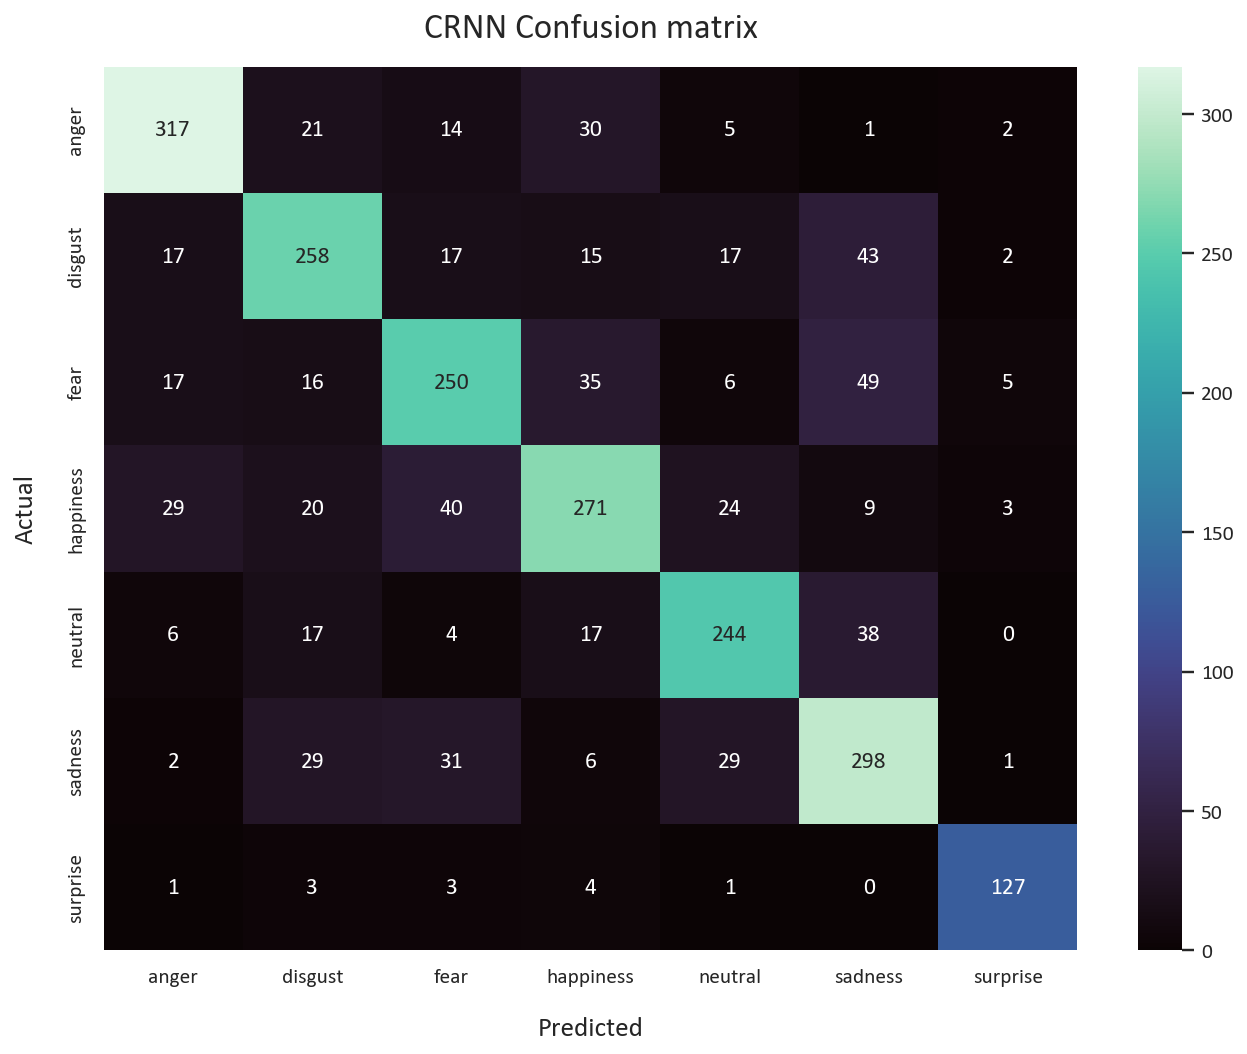

In [85]:
# Plot the confusion matrix for the validation set
# Get the predictions for the test data
y_pred = model_crnn.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Get the confusion matrix
cm = tf.math.confusion_matrix(y_test_2, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm, annot=True, fmt='', cmap='mako')
plt.title('CRNN Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

## 6- Model Evaluation and Conclusion

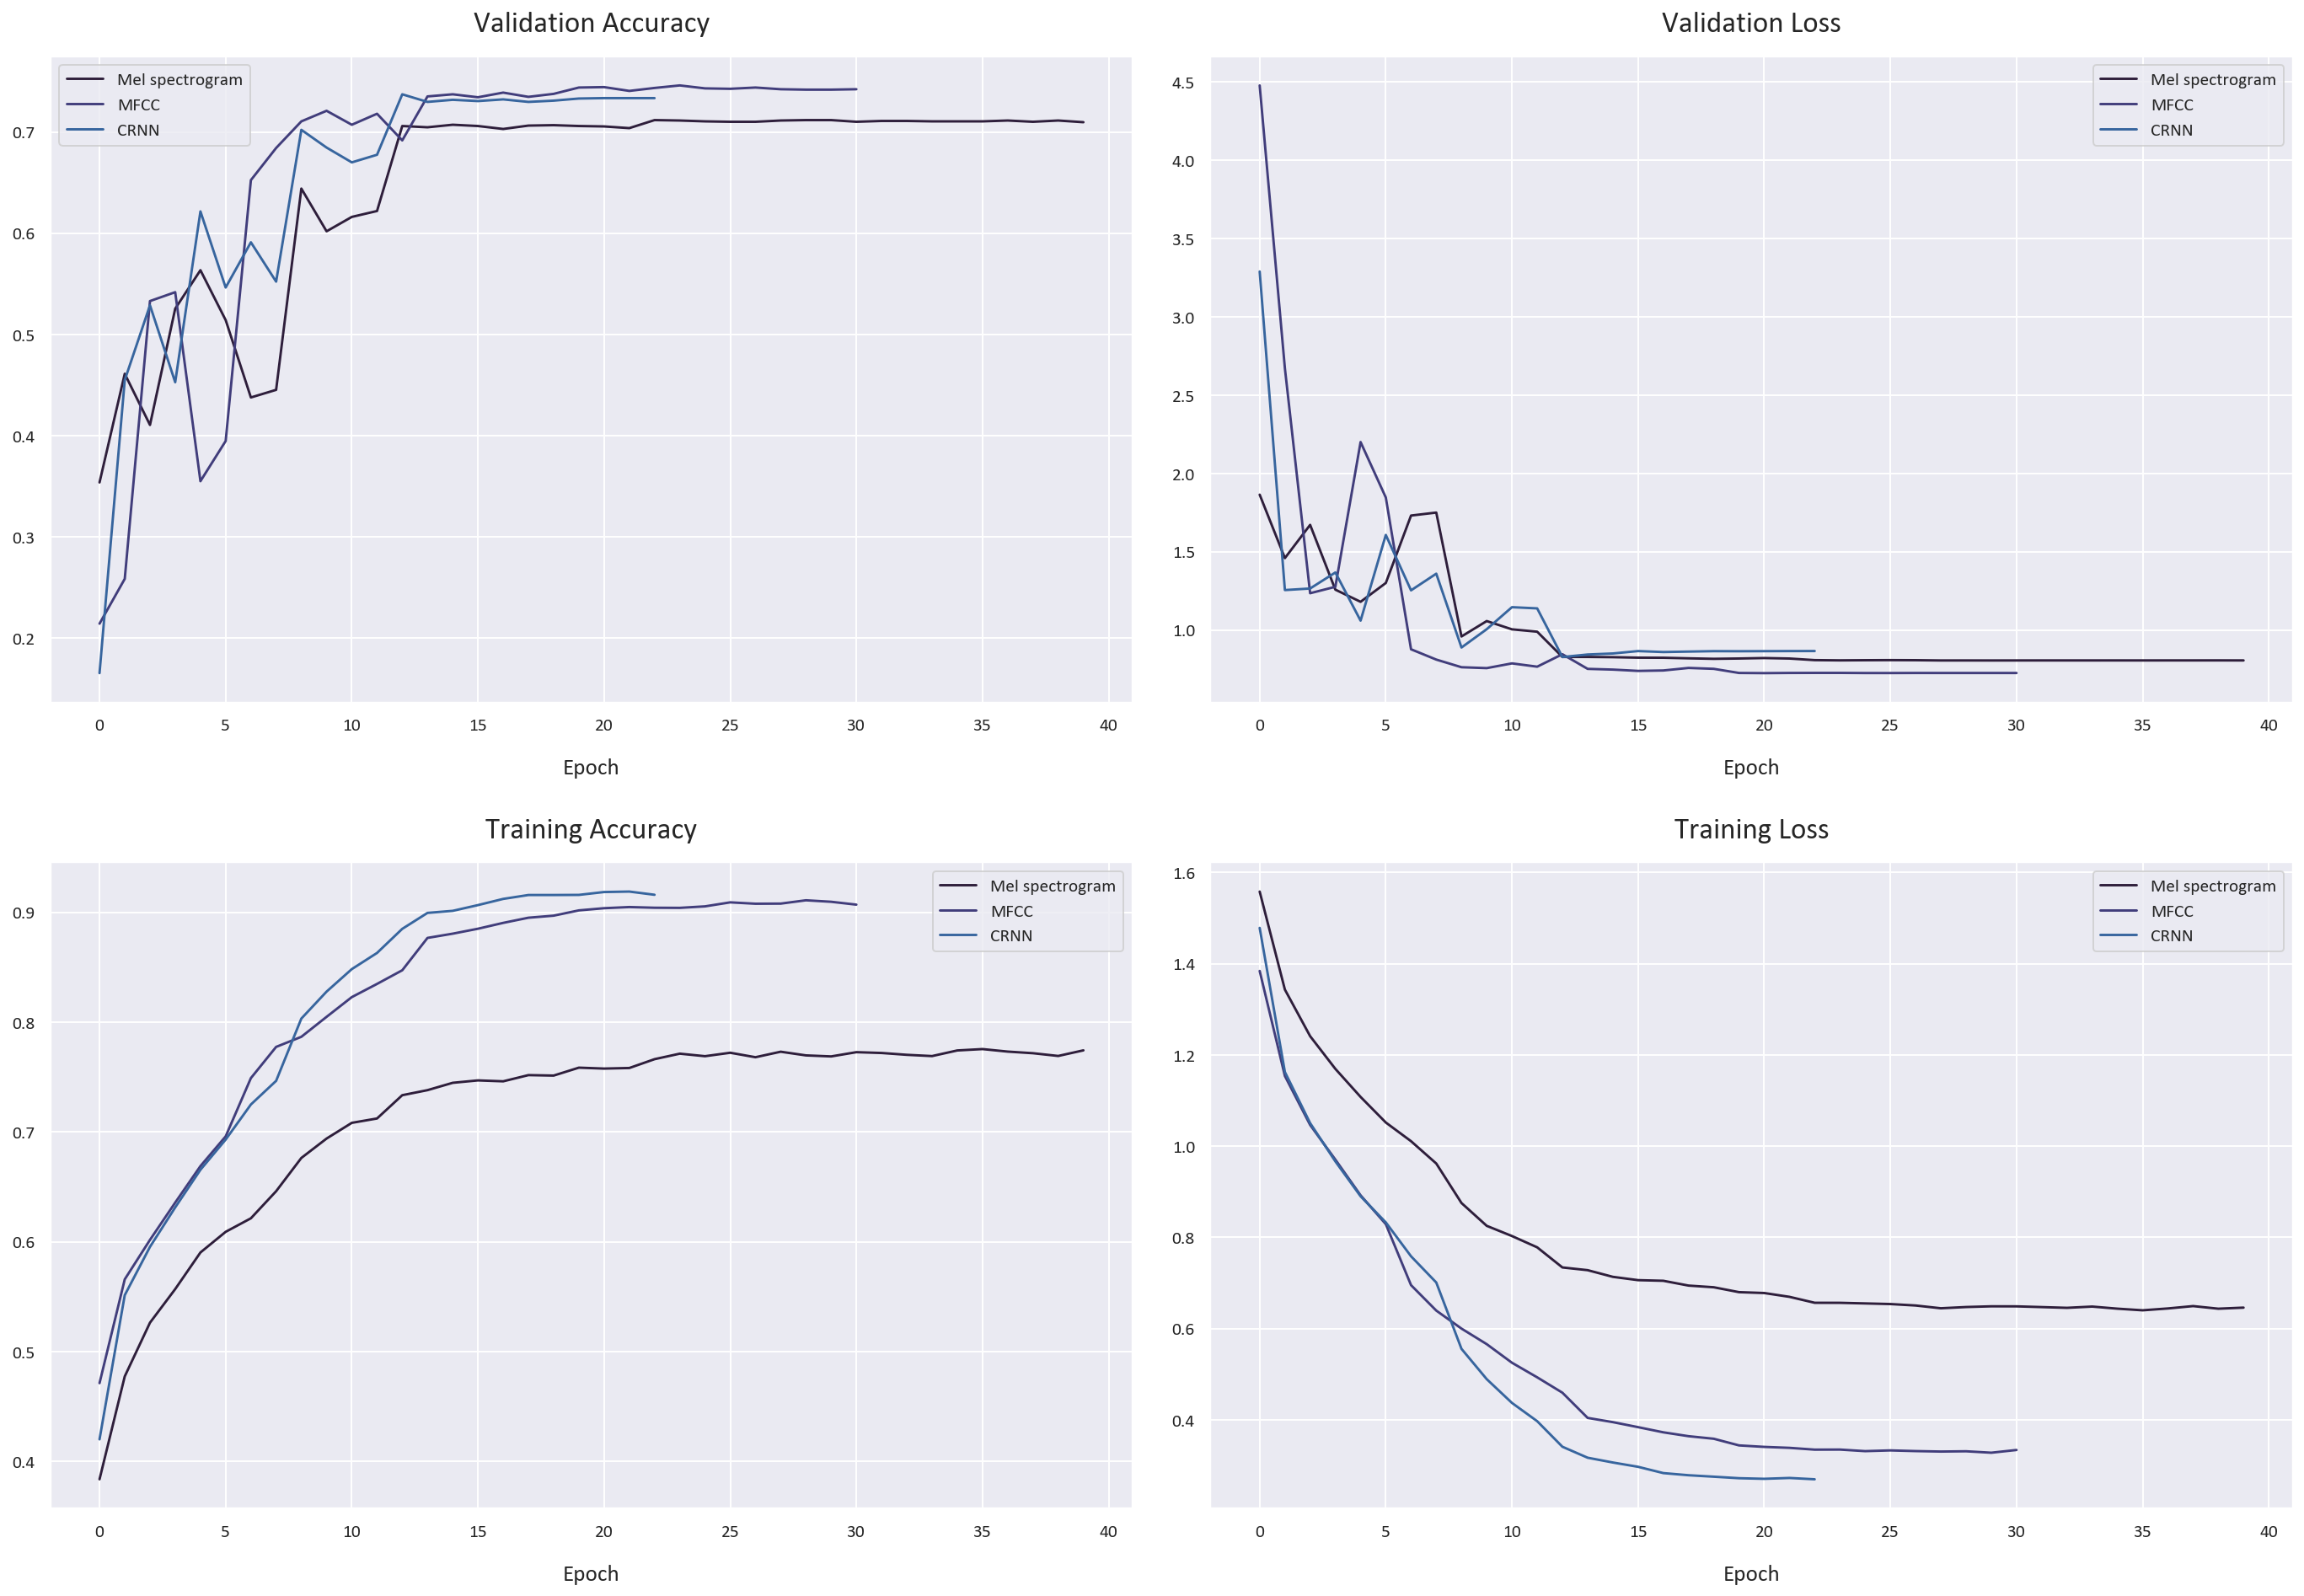

In [86]:
# Compare the performance of the models
sns.set_palette('mako')
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
plt.plot(history_mel.history['val_accuracy'], label='Mel spectrogram')
plt.plot(history_mfcc.history['val_accuracy'], label='MFCC')
plt.plot(history_crnn.history['val_accuracy'], label='CRNN')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(history_mel.history['val_loss'], label='Mel spectrogram')
plt.plot(history_mfcc.history['val_loss'], label='MFCC')
plt.plot(history_crnn.history['val_loss'], label='CRNN')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(history_mel.history['accuracy'], label='Mel spectrogram')
plt.plot(history_mfcc.history['accuracy'], label='MFCC')
plt.plot(history_crnn.history['accuracy'], label='CRNN')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(history_mel.history['loss'], label='Mel spectrogram')
plt.plot(history_mfcc.history['loss'], label='MFCC')
plt.plot(history_crnn.history['loss'], label='CRNN')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout(pad=2)

As we can see, the MFCC CNN model performed the best, with a validation accuracy of about 74.2%. This is a 3.2% improvement over the Mel Spectrogram CNN model. This is a significant improvement, as it is hard to improve the accuracy of a model that is already performing well. 

It overfit a bit, but this is expected, as the model is complex and the dataset is small. It also generalized pretty well, converged the fastest, and was the most stable. The same is true for validation loss.

This is because MFCCs are a better representation of the audio files than Mel Spectrograms. 

The CRNN overfit a lot but had the second best validation accuracy. This is because CRNNs are very powerful, but they are also prone to overfitting.

The mel spectrogram CNN model performed the worst, with a validation accuracy of about 71%. This is expected, as Mel Spectrograms are not a good representation of the audio files. However, it still performed well, and generalized well, with the validation accuracy being close to the training accuracy.


In [46]:
# Load the three models
model_mel = tf.keras.models.load_model('emotion_recognition_mel_spec.keras')
model_mfcc = tf.keras.models.load_model('emotion_recognition_mfcc.keras')
model_crnn = tf.keras.models.load_model('emotion_recognition_crnn.keras')

In [47]:
# Get the predictions for the mel test data
y_pred_mel = model_mel.predict(X_test_1)

75/75 [==============================] - 6s 18ms/step


In [48]:
# Get the predictions for the mfcc test data
y_pred_mfcc = model_mfcc.predict(X_test_2)

75/75 [==============================] - 2s 17ms/step


In [49]:
# Get the predictions for the crnn test data
y_pred_crnn = model_crnn.predict(X_test_2)

75/75 [==============================] - 2s 9ms/step


In [50]:
# Convert the predictions into one-hot encoded vectors
y_pred_mel = np.argmax(y_pred_mel, axis=1)
y_pred_mfcc = np.argmax(y_pred_mfcc, axis=1)
y_pred_crnn = np.argmax(y_pred_crnn, axis=1)
# Get the confusion matrices
cm_mel = tf.math.confusion_matrix(y_test_1, y_pred_mel)
cm_mfcc = tf.math.confusion_matrix(y_test_2, y_pred_mfcc)
cm_crnn = tf.math.confusion_matrix(y_test_2, y_pred_crnn)

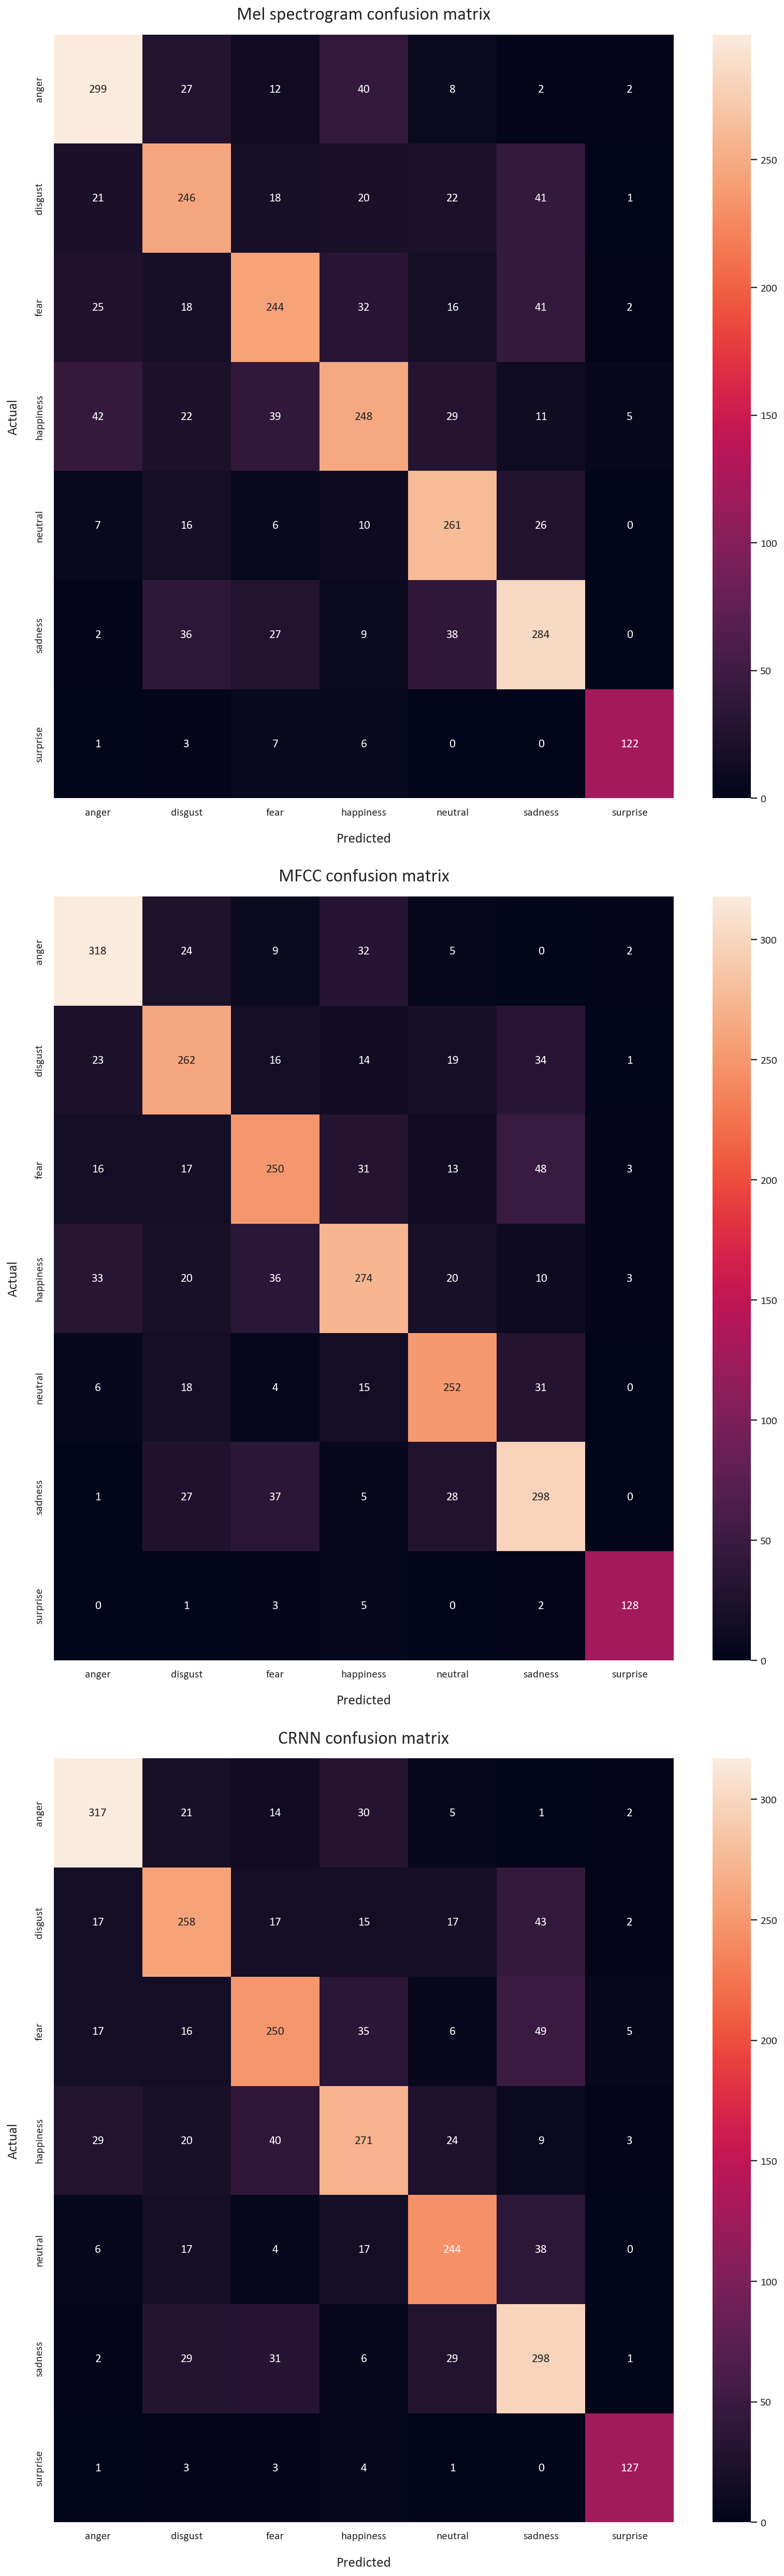

In [51]:
# Plot the confusion matrices
plt.figure(figsize=(12, 36))
plt.subplot(3, 1, 1)
# Make the index and column labels the emotion names
cm_mel = pd.DataFrame(cm_mel.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_mel, annot=True, fmt='', cmap='rocket')
plt.title('Mel spectrogram confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(3, 1, 2)
# Make the index and column labels the emotion names
cm_mfcc = pd.DataFrame(cm_mfcc.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_mfcc, annot=True, fmt='', cmap='rocket')
plt.title('MFCC confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(3, 1, 3)
# Make the index and column labels the emotion names
cm_crnn = pd.DataFrame(cm_crnn.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_crnn, annot=True, fmt='', cmap='rocket')
plt.title('CRNN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

In [93]:
# Compare the precision and recall of the models
print('Mel spectrogram')
print(classification_report(y_test_1, y_pred_mel, target_names=encoder.classes_))
print('MFCC')
print(classification_report(y_test_2, y_pred_mfcc, target_names=encoder.classes_))
print('CRNN')
print(classification_report(y_test_2, y_pred_crnn, target_names=encoder.classes_))

Mel spectrogram
              precision    recall  f1-score   support

       anger       0.75      0.77      0.76       390
     disgust       0.67      0.67      0.67       369
        fear       0.69      0.65      0.67       378
   happiness       0.68      0.63      0.65       396
     neutral       0.70      0.80      0.75       326
     sadness       0.70      0.72      0.71       396
    surprise       0.92      0.88      0.90       139

    accuracy                           0.71      2394
   macro avg       0.73      0.73      0.73      2394
weighted avg       0.71      0.71      0.71      2394

MFCC
              precision    recall  f1-score   support

       anger       0.80      0.82      0.81       390
     disgust       0.71      0.71      0.71       369
        fear       0.70      0.66      0.68       378
   happiness       0.73      0.69      0.71       396
     neutral       0.75      0.77      0.76       326
     sadness       0.70      0.75      0.73       396
   

Looking at the confusion matrix and the precision and recall, we can see that the models performed well in general, with fear and sadness being the least recognized emotions. This is expected, as fear and sadness are very subtle emotions, and they are hard to recognize even for humans.

As for the f1-scores, the MFCC CNN model performed the best, with a macro average of 0.76 and a weighted average of 0.74. The CRNN model came second, with a macro average of 0.75 and a weighted average of 0.74. The Mel Spectrogram CNN model came last, with a macro average of 0.73 and a weighted average of 0.71.

Overall, all of the models performed really well, with the MFCC CNN model approaching state of the art performance. For such a complex task and such a simple model, this is a fantastic result.